# Weber Fractions and JNDs Analysis: Cross-Modal Temporal Discrimination

This notebook analyzes Weber fractions and Just Noticeable Differences (JNDs) across unimodal auditory and visual temporal discrimination conditions to examine cue reliability effects and cross-modal precision differences.

## Overview
- **Visual condition**: High-quality visual stimuli (baseline)
- **Auditory high reliability**: Low noise (0.1) 
- **Auditory low reliability**: High noise (1.2)
- **Standard duration**: 500ms across all conditions

## 1. Import Libraries and Setup

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("✓ Libraries imported successfully")

# Set global parameters
STANDARD_DURATION = 0.5  # 500ms standard duration
FONT_SIZE = 14
TITLE_SIZE = 16

✓ Libraries imported successfully


## 2. Define Experimental Results

In [14]:
# Fitted parameters from the combined analysis - CORRECTED VALUES
# Based on the actual fitted results from fitNonSharedwErrorBars.py:

# Extract parameters for each condition (from actual fitting output)
lambda_shared = 0.0792  # Shared lapse rate

# Visual condition (noise = 99 - label only, not actual noise manipulation)
mu_visual = 0.0  # Bias fixed at 0
sigma_visual = 0.5046  # Precision parameter

# Auditory high reliability (noise = 0.1) - best precision (lowest σ)  
mu_auditory_high = 0.0  # Bias fixed at 0
sigma_auditory_high = 0.2726  # Precision parameter

# Auditory low reliability (noise = 1.2) - worst precision (highest σ)
mu_auditory_low = 0.0  # Bias fixed at 0
sigma_auditory_low = 0.9706  # Precision parameter

# Standard duration used in the experiment (in experiment units, not ms)
standard_duration = 0.5  # This is 500ms in the experiment
standard_duration_ms = 500  # For JND calculations

print("CORRECTED Fitted Parameters Summary:")
print(f"Shared lapse rate (λ): {lambda_shared:.4f}")
print("\nCondition-specific parameters:")
print(f"Visual (noise=99 - label only): μ={mu_visual:.3f}, σ={sigma_visual:.4f}")
print(f"Auditory High Rel (noise=0.1): μ={mu_auditory_high:.3f}, σ={sigma_auditory_high:.4f}")
print(f"Auditory Low Rel (noise=1.2): μ={mu_auditory_low:.3f}, σ={sigma_auditory_low:.4f}")

# Calculate Weber fractions (σ/standard_duration) - CORRECTED
weber_visual = sigma_visual / standard_duration
weber_auditory_high = sigma_auditory_high / standard_duration  
weber_auditory_low = sigma_auditory_low / standard_duration

# Calculate JNDs (0.6745 * σ * standard_duration_ms) - CORRECTED
jnd_visual = 0.6745 * sigma_visual * standard_duration_ms
jnd_auditory_high = 0.6745 * sigma_auditory_high * standard_duration_ms
jnd_auditory_low = 0.6745 * sigma_auditory_low * standard_duration_ms

print("\nWeber Fractions:")
print(f"Visual: {weber_visual:.4f}")
print(f"Auditory High Rel: {weber_auditory_high:.4f}")
print(f"Auditory Low Rel: {weber_auditory_low:.4f}")
print("\nJNDs (ms):")
print(f"Visual: {jnd_visual:.1f} ms")
print(f"Auditory High Rel: {jnd_auditory_high:.1f} ms")
print(f"Auditory Low Rel: {jnd_auditory_low:.1f} ms")

print("\nPrecision Ranking (best to worst):")
print("1. Auditory High Rel (lowest σ = best precision)")
print("2. Visual")  
print("3. Auditory Low Rel (highest σ = worst precision)")

print("\nNote: Visual 'noise=99' is just a label since visual noise wasn't manipulated")
print("The σ values represent the precision of temporal discrimination in each condition")

CORRECTED Fitted Parameters Summary:
Shared lapse rate (λ): 0.0792

Condition-specific parameters:
Visual (noise=99 - label only): μ=0.000, σ=0.5046
Auditory High Rel (noise=0.1): μ=0.000, σ=0.2726
Auditory Low Rel (noise=1.2): μ=0.000, σ=0.9706

Weber Fractions:
Visual: 1.0092
Auditory High Rel: 0.5452
Auditory Low Rel: 1.9412

JNDs (ms):
Visual: 170.2 ms
Auditory High Rel: 91.9 ms
Auditory Low Rel: 327.3 ms

Precision Ranking (best to worst):
1. Auditory High Rel (lowest σ = best precision)
2. Visual
3. Auditory Low Rel (highest σ = worst precision)

Note: Visual 'noise=99' is just a label since visual noise wasn't manipulated
The σ values represent the precision of temporal discrimination in each condition


## 2.1 Critical Analysis: 2IFC Sigma Correction and Statistical Testing

**Important methodological considerations:**

1. **Sigma interpretation in 2IFC**: The fitted σ values are from cumulative normal fits to 2IFC psychometric curves. In 2IFC, participants compare two noisy measurements (test vs standard). If each individual measurement has noise σ_measurement, then the difference between measurements has noise σ_curve = √2 × σ_measurement.

2. **Cumulative normal limitations**: Fitting a cumulative normal is problematic because it assigns non-zero probability to negative durations (which don't exist), making the linear-time model questionable.

3. **Statistical testing approach**: 
   - **Individual participant fits**: We have 12 participants with fitted σ values for each condition
   - **Non-parametric tests**: Using Wilcoxon signed-rank test (paired, non-parametric) because:
     - Small sample size (N = 12)
     - No assumption of normality on fitted parameters
     - Same participants across all conditions (within-subject design)
   - **Friedman test**: Overall comparison across all three conditions
   - **Bonferroni correction**: Applied for multiple pairwise comparisons (α = 0.05/3 = 0.0167)

In [1]:
# 2IFC Sigma Correction and Bootstrap Statistical Testing
import numpy as np
from scipy import stats

# Original fitted sigmas from cumulative normal fits to 2IFC curves
sigma_curve_visual = 0.5046
sigma_curve_auditory_high = 0.2726  
sigma_curve_auditory_low = 0.9706

# CORRECTED: Convert curve sigmas to measurement sigmas
# For 2IFC: sigma_curve = sqrt(2) * sigma_measurement
# Therefore: sigma_measurement = sigma_curve / sqrt(2)

sigma_measurement_visual = sigma_curve_visual / np.sqrt(2)
sigma_measurement_auditory_high = sigma_curve_auditory_high / np.sqrt(2)
sigma_measurement_auditory_low = sigma_curve_auditory_low / np.sqrt(2)

print("CORRECTED Measurement Sigmas (accounting for 2IFC):")
print("="*60)
print(f"Original curve σ → Corrected measurement σ")
print(f"Visual:           {sigma_curve_visual:.4f} → {sigma_measurement_visual:.4f}")
print(f"Auditory High:    {sigma_curve_auditory_high:.4f} → {sigma_measurement_auditory_high:.4f}")
print(f"Auditory Low:     {sigma_curve_auditory_low:.4f} → {sigma_measurement_auditory_low:.4f}")

# Recalculate Weber fractions with corrected sigmas
weber_corrected_visual = sigma_measurement_visual / standard_duration
weber_corrected_auditory_high = sigma_measurement_auditory_high / standard_duration
weber_corrected_auditory_low = sigma_measurement_auditory_low / standard_duration

print(f"\nCORRECTED Weber Fractions:")
print(f"Visual:           {weber_corrected_visual:.4f}")
print(f"Auditory High:    {weber_corrected_auditory_high:.4f}")
print(f"Auditory Low:     {weber_corrected_auditory_low:.4f}")

# Recalculate JNDs with corrected sigmas
jnd_corrected_visual = 0.6745 * sigma_measurement_visual * standard_duration_ms
jnd_corrected_auditory_high = 0.6745 * sigma_measurement_auditory_high * standard_duration_ms
jnd_corrected_auditory_low = 0.6745 * sigma_measurement_auditory_low * standard_duration_ms

print(f"\nCORRECTED JNDs (ms):")
print(f"Visual:           {jnd_corrected_visual:.1f} ms")
print(f"Auditory High:    {jnd_corrected_auditory_high:.1f} ms")
print(f"Auditory Low:     {jnd_corrected_auditory_low:.1f} ms")

CORRECTED Measurement Sigmas (accounting for 2IFC):
Original curve σ → Corrected measurement σ
Visual:           0.5046 → 0.3568
Auditory High:    0.2726 → 0.1928
Auditory Low:     0.9706 → 0.6863


NameError: name 'standard_duration' is not defined

In [92]:
# Load individual participant log-normal fits
# Model: P(choose test) = λ/2 + (1-λ) * Φ((ln(test/standard) - μ) / σ)
# Toggle FIXED_MU to match the re-fitting cell

import scipy.io, os
from scipy.stats import wilcoxon, friedmanchisquare

# ====================== CONFIGURATION ======================
FIXED_MU = True           # Must match the re-fitting cell
MIN_TEST_DUR_S = 0     # Must match the re-fitting cell
# ============================================================

_mu_str = "fixedMu" if FIXED_MU else "freeMu"
_filt_str = "_filtered" if MIN_TEST_DUR_S > 0 else ""
FIT_SUFFIX = f"_fits_logNormal_{_mu_str}{_filt_str}"

participant_ids = ['as', 'dt', 'hh', 'ip', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx', 'ln1']
data_dir = "data/"

sigma_visual_list, mu_visual_list = [], []
sigma_auditory_high_list, sigma_auditory_low_list = [], []
mu_auditory_high_list, mu_auditory_low_list = [], []
valid_participants = []

for pid in participant_ids:
    try:
        aud_data = scipy.io.loadmat(os.path.join(data_dir, f"{pid}_auditory{FIT_SUFFIX}.mat"))
        vis_data = scipy.io.loadmat(os.path.join(data_dir, f"{pid}_visual{FIT_SUFFIX}.mat"))
        aud_params = aud_data['fittedParams'].flatten()
        vis_params = vis_data['fittedParams'].flatten()
        
        # Layout always: [lambda, sigma1, sigma2, mu1, mu2] (mu=0 when fixedMu)
        sigma_auditory_high_list.append(aud_params[1])
        sigma_auditory_low_list.append(aud_params[2])
        mu_auditory_high_list.append(aud_params[3])
        mu_auditory_low_list.append(aud_params[4])
        # Visual: [lambda, sigma, mu]
        sigma_visual_list.append(vis_params[1])
        mu_visual_list.append(vis_params[2])
        valid_participants.append(pid)
    except Exception as e:
        print(f"Skipped {pid}: {e}")

sigma_visual = np.array(sigma_visual_list)
mu_visual = np.array(mu_visual_list)
sigma_auditory_high = np.array(sigma_auditory_high_list)
sigma_auditory_low = np.array(sigma_auditory_low_list)
mu_auditory_high = np.array(mu_auditory_high_list)
mu_auditory_low = np.array(mu_auditory_low_list)
n_participants = len(valid_participants)

# ============================================================================
# CONVERSION FUNCTIONS
# ============================================================================
# When μ=0 (fixedMu):
#   SD  = T_std × √(exp(σ²) - 1) × exp(σ²/2)    [simplifies from full formula]
#   JND = T_std × (exp(0.6745σ) - 1)
#   Weber = √(exp(σ²) - 1)
# When μ free:
#   SD  = T_std × √[(exp(σ²) - 1) × exp(2μ + σ²)]
#   JND = T_std × exp(μ) × (exp(0.6745σ) - 1)
# ============================================================================

standard_dur_s = 0.6
z_75 = 0.6745

def log_to_linear_sd_s(sigma_log, mu_log):
    """SD in seconds."""
    var_lin = np.exp(2*mu_log + sigma_log**2) * (np.exp(sigma_log**2) - 1)
    return np.sqrt(var_lin) * standard_dur_s

def log_to_weber(sigma_log):
    """Weber fraction (CV): √(exp(σ²) - 1)"""
    return np.sqrt(np.exp(sigma_log**2) - 1)

def log_to_jnd_s(sigma_log, mu_log):
    """JND at 75% in seconds."""
    return standard_dur_s * np.exp(mu_log) * (np.exp(z_75 * sigma_log) - 1)

def log_to_pse_shift_s(mu_log):
    """PSE shift in seconds."""
    return standard_dur_s * (np.exp(mu_log) - 1)

# ============================================================================
# REPORT
# ============================================================================
print(f"Loaded {n_participants} participants: {valid_participants}")
print(f"Suffix: {FIT_SUFFIX}  |  FIXED_MU={FIXED_MU}")
print()

conditions = [
    ("Aud High Rel (0.1)", sigma_auditory_high, mu_auditory_high),
    ("Visual",             sigma_visual,        mu_visual),
    ("Aud Low Rel (1.2)",  sigma_auditory_low,  mu_auditory_low),
]

print("="*65)
print(" AVERAGE σ AND μ")
print("="*65)
for name, sig, mu in conditions:
    line = f"  {name:<20s}  σ = {np.mean(sig):.4f} ± {np.std(sig):.4f}"
    if not FIXED_MU:
        line += f"   μ = {np.mean(mu):.4f} ± {np.std(mu):.4f}"
    print(line)

print("\n" + "="*65)
print(" CONVERTED TO LINEAR SPACE using mean(σ)" + ("" if FIXED_MU else ", mean(μ)"))
print("="*65)
for name, sig, mu in conditions:
    ms  = np.mean(sig)
    mm  = np.mean(mu)  # 0 when fixedMu
    sd_s  = log_to_linear_sd_s(ms, mm)
    w     = log_to_weber(ms)
    jnd_s = log_to_jnd_s(ms, mm)
    print(f"\n  {name}  (σ={ms:.4f}):")
    print(f"    SD        = {sd_s*1000:.1f} ms")
    print(f"    Weber (W) = {w:.4f}")
    print(f"    JND 75%   = {jnd_s*1000:.1f} ms")
    if not FIXED_MU:
        pse_s = log_to_pse_shift_s(mm)
        print(f"    PSE shift = {pse_s*1000:.1f} ms")

# Per-person arrays for downstream stats/plots
sd_vis        = log_to_linear_sd_s(sigma_visual, mu_visual) * 1000
sd_aud_high   = log_to_linear_sd_s(sigma_auditory_high, mu_auditory_high) * 1000
sd_aud_low    = log_to_linear_sd_s(sigma_auditory_low, mu_auditory_low) * 1000
weber_vis       = log_to_weber(sigma_visual)
weber_aud_high  = log_to_weber(sigma_auditory_high)
weber_aud_low   = log_to_weber(sigma_auditory_low)
sigma_vis_ms      = log_to_jnd_s(sigma_visual, mu_visual) * 1000
sigma_aud_high_ms = log_to_jnd_s(sigma_auditory_high, mu_auditory_high) * 1000
sigma_aud_low_ms  = log_to_jnd_s(sigma_auditory_low, mu_auditory_low) * 1000
standard_dur_ms = 500

# Per-participant table
print("\n" + "="*65)
print(" PER-PARTICIPANT: σ" + ("" if FIXED_MU else ", μ") + ", SD(ms), JND(ms)")
print("="*65)
if FIXED_MU:
    header = f"  {'PID':>4}  {'σ':>6}  {'SD(ms)':>8}  {'JND(ms)':>8}"
else:
    header = f"  {'PID':>4}  {'σ':>6}  {'μ':>7}  {'SD(ms)':>8}  {'JND(ms)':>8}"

for cond_name, sig, mu in conditions:
    print(f"\n  {cond_name}:")
    print(header)
    for i, pid in enumerate(valid_participants):
        sd_ms  = log_to_linear_sd_s(sig[i], mu[i]) * 1000
        jnd_ms = log_to_jnd_s(sig[i], mu[i]) * 1000
        flag = " ⚠" if sig[i] > 0.8 else ""
        if FIXED_MU:
            print(f"  {pid:>4}  {sig[i]:>6.3f}  {sd_ms:>8.1f}  {jnd_ms:>8.1f}{flag}")
        else:
            flag = " ⚠" if sig[i] > 0.8 or abs(mu[i]) > 0.5 else ""
            print(f"  {pid:>4}  {sig[i]:>6.3f}  {mu[i]:>7.4f}  {sd_ms:>8.1f}  {jnd_ms:>8.1f}{flag}")

Skipped ln1: [Errno 2] No such file or directory: 'data/ln1_auditory_fits_logNormal_fixedMu.mat'
Loaded 11 participants: ['as', 'dt', 'hh', 'ip', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Suffix: _fits_logNormal_fixedMu  |  FIXED_MU=True

 AVERAGE σ AND μ
  Aud High Rel (0.1)    σ = 0.2700 ± 0.1007
  Visual                σ = 0.6823 ± 0.3142
  Aud Low Rel (1.2)     σ = 1.7972 ± 1.1663

 CONVERTED TO LINEAR SPACE using mean(σ)

  Aud High Rel (0.1)  (σ=0.2700):
    SD        = 171.1 ms
    Weber (W) = 0.2750
    JND 75%   = 119.8 ms

  Visual  (σ=0.6823):
    SD        = 583.0 ms
    Weber (W) = 0.7700
    JND 75%   = 350.6 ms

  Aud Low Rel (1.2)  (σ=1.7972):
    SD        = 14864.3 ms
    Weber (W) = 4.9274
    JND 75%   = 1416.6 ms

 PER-PARTICIPANT: σ, SD(ms), JND(ms)

  Aud High Rel (0.1):
   PID       σ    SD(ms)   JND(ms)
    as   0.010       6.0       4.1
    dt   0.328     213.3     148.5
    hh   0.272     172.6     120.8
    ip   0.389     261.5     180.0
   ln2   0.252     

# REFITTING PSYCHOMETRIC CURVES WITH MIN_TEST_DUR_S = 0 (NO FILTER)

In [93]:
# ============================================================================
# RE-FIT ALL PARTICIPANTS: LOG-NORMAL model
# Toggle FIXED_MU to switch between fixedMu=1 (μ=0) and fixedMu=0 (free μ)
# ============================================================================

import numpy as np, pandas as pd, scipy.io, os
from scipy.stats import norm
from scipy.optimize import minimize
from tqdm import tqdm

# ====================== CONFIGURATION ======================
FIXED_MU = FIXED_MU           # True → μ forced to 0;  False → μ free
MIN_TEST_DUR_S = MIN_TEST_DUR_S      # Filter threshold (0 = no filter)
# ============================================================

# Build suffix from config
_mu_str = "fixedMu" if FIXED_MU else "freeMu"
_filt_str = "_filtered" if MIN_TEST_DUR_S > 0 else ""
SAVE_SUFFIX = f"_fits_logNormal_{_mu_str}{_filt_str}"

print(f"FIXED_MU = {FIXED_MU}  |  MIN_TEST_DUR_S = {MIN_TEST_DUR_S}")
print(f"Save suffix: {SAVE_SUFFIX}")
print("="*80)

# --- psychometric function ---
def psychometric_lognormal_refit(test_dur, standard_dur, lambda_, mu, sigma):
    z = (np.log(test_dur / standard_dur) - mu) / sigma
    return lambda_/2 + (1 - lambda_) * norm.cdf(z)

# --- NLL: joint auditory (two noise levels) ---
def nll_joint_refit(params, test_durs, standard_durs, chose_test, total_resp,
                    noise_levels, unique_noise, fixed_mu):
    n_noise = len(unique_noise)
    lambda_ = params[0]
    sigmas  = params[1:1+n_noise]
    mus     = np.zeros(n_noise) if fixed_mu else params[1+n_noise:1+2*n_noise]

    nll = 0.0
    for i in range(len(test_durs)):
        nidx  = np.where(unique_noise == noise_levels.iloc[i])[0][0]
        p = psychometric_lognormal_refit(test_durs.iloc[i], standard_durs.iloc[i],
                                         lambda_, mus[nidx], sigmas[nidx])
        p = np.clip(p, 1e-10, 1 - 1e-10)
        nll -= chose_test.iloc[i]*np.log(p) + (total_resp.iloc[i]-chose_test.iloc[i])*np.log(1-p)
    return nll

# --- NLL: single condition (visual) ---
def nll_single_refit(params, test_durs, standard_durs, chose_test, total_resp, fixed_mu):
    lambda_, sigma = params[0], params[1]
    mu = 0.0 if fixed_mu else params[2]

    nll = 0.0
    for i in range(len(test_durs)):
        p = psychometric_lognormal_refit(test_durs.iloc[i], standard_durs.iloc[i],
                                         lambda_, mu, sigma)
        p = np.clip(p, 1e-10, 1 - 1e-10)
        nll -= chose_test.iloc[i]*np.log(p) + (total_resp.iloc[i]-chose_test.iloc[i])*np.log(1-p)
    return nll

# --- Fit auditory ---
def fit_participant_auditory(data, unique_noise, fixed_mu):
    n_noise = len(unique_noise)
    grouped = data.groupby(['testDurS', 'audNoise', 'standardDur']).agg(
        chose_test=('chose_test', 'sum'),
        total_responses=('responses', 'count')).reset_index()

    best_result, best_nll = None, np.inf
    for lam_init in [0.02, 0.05, 0.1]:
        for sig_init in [0.3, 0.6, 1.0]:
            if fixed_mu:
                x0 = [lam_init] + [sig_init]*n_noise
                bounds = [(0, 0.25)] + [(0.01, 3.5)]*n_noise
            else:
                for mu_init in [-0.1, 0.0, 0.1]:
                    x0 = [lam_init] + [sig_init]*n_noise + [mu_init]*n_noise
                    bounds = [(0, 0.25)] + [(0.01, 3.5)]*n_noise + [(-1.0, 1.0)]*n_noise
                    try:
                        r = minimize(nll_joint_refit, x0=x0,
                                     args=(grouped['testDurS'], grouped['standardDur'],
                                           grouped['chose_test'], grouped['total_responses'],
                                           grouped['audNoise'], unique_noise, fixed_mu),
                                     bounds=bounds, method='L-BFGS-B')
                        if r.fun < best_nll: best_nll, best_result = r.fun, r
                    except: pass
                continue  # skip the fixed_mu branch below since we already looped mu_init
            try:
                r = minimize(nll_joint_refit, x0=x0,
                             args=(grouped['testDurS'], grouped['standardDur'],
                                   grouped['chose_test'], grouped['total_responses'],
                                   grouped['audNoise'], unique_noise, fixed_mu),
                             bounds=bounds, method='L-BFGS-B')
                if r.fun < best_nll: best_nll, best_result = r.fun, r
            except: pass
    return best_result

# --- Fit visual ---
def fit_participant_visual(data, fixed_mu):
    grouped = data.groupby(['testDurS', 'standardDur']).agg(
        chose_test=('chose_test', 'sum'),
        total_responses=('responses', 'count')).reset_index()

    best_result, best_nll = None, np.inf
    for lam_init in [0.02, 0.05, 0.1]:
        for sig_init in [0.3, 0.5, 0.8]:
            if fixed_mu:
                x0 = [lam_init, sig_init]
                bounds = [(0, 0.25), (0.01, 3.0)]
            else:
                for mu_init in [-0.1, 0.0, 0.1]:
                    x0 = [lam_init, sig_init, mu_init]
                    bounds = [(0, 0.25), (0.01, 3.0), (-1.0, 1.0)]
                    try:
                        r = minimize(nll_single_refit, x0=x0,
                                     args=(grouped['testDurS'], grouped['standardDur'],
                                           grouped['chose_test'], grouped['total_responses'], fixed_mu),
                                     bounds=bounds, method='L-BFGS-B')
                        if r.fun < best_nll: best_nll, best_result = r.fun, r
                    except: pass
                continue
            try:
                r = minimize(nll_single_refit, x0=x0,
                             args=(grouped['testDurS'], grouped['standardDur'],
                                   grouped['chose_test'], grouped['total_responses'], fixed_mu),
                             bounds=bounds, method='L-BFGS-B')
                if r.fun < best_nll: best_nll, best_result = r.fun, r
            except: pass
    return best_result

# ============================================================================
# LOAD DATA, FILTER, AND FIT
# ============================================================================
participant_ids = ['as', 'dt', 'hh', 'ip', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx', 'ln1']
refit_results = {}

for pid in tqdm(participant_ids, desc="Fitting"):
    try:
        aud_file = f"data/{pid}_auditory.csv"
        vis_file = f"data/{pid}_visual.csv"
        if not os.path.exists(aud_file):
            print(f"  {pid}: No auditory CSV, skipping"); continue

        # Load & filter auditory
        aud_df = pd.read_csv(aud_file)
        aud_df = aud_df[(aud_df['audNoise'] != 0) & (aud_df['standardDur'] != 0)]
        aud_df['chose_test'] = (aud_df['responses'] == aud_df['order']).astype(int)
        n_before_aud = len(aud_df)
        if MIN_TEST_DUR_S > 0:
            aud_df = aud_df[aud_df['testDurS'] >= MIN_TEST_DUR_S]
        n_after_aud = len(aud_df)
        unique_noise = np.sort(aud_df['audNoise'].unique())
        n_noise = len(unique_noise)

        aud_fit = fit_participant_auditory(aud_df, unique_noise, FIXED_MU)

        # Load & filter visual
        vis_fit = None
        n_before_vis = n_after_vis = 0
        if os.path.exists(vis_file):
            vis_df = pd.read_csv(vis_file)
            vis_df = vis_df[(vis_df['audNoise'] != 0) & (vis_df['standardDur'] != 0)]
            vis_df['chose_test'] = (vis_df['responses'] == vis_df['order']).astype(int)
            n_before_vis = len(vis_df)
            if MIN_TEST_DUR_S > 0:
                vis_df = vis_df[vis_df['testDurS'] >= MIN_TEST_DUR_S]
            n_after_vis = len(vis_df)
            if n_after_vis >= 5:
                vis_fit = fit_participant_visual(vis_df, FIXED_MU)

        filt_str = f"(removed aud:{n_before_aud-n_after_aud}/{n_before_aud}, vis:{n_before_vis-n_after_vis}/{n_before_vis})"

        if aud_fit is not None:
            aud_params = aud_fit.x
            # Normalize to consistent layout: [lambda, sigma1, sigma2, mu1, mu2]
            # For fixedMu: fitted is [lambda, sigma1, sigma2] → pad with zeros for mu
            if FIXED_MU:
                aud_save = np.concatenate([aud_params, np.zeros(n_noise)])  # [lam, sig1, sig2, 0, 0]
            else:
                aud_save = aud_params  # already [lam, sig1, sig2, mu1, mu2]

            scipy.io.savemat(f"data/{pid}_auditory{SAVE_SUFFIX}.mat",
                           {'fittedParams': aud_save, 'unique_noise': unique_noise,
                            'n_trials': n_after_aud, 'min_test_dur_s': MIN_TEST_DUR_S,
                            'fixed_mu': int(FIXED_MU)})

        if vis_fit is not None:
            vis_params = vis_fit.x
            if FIXED_MU:
                vis_save = np.concatenate([vis_params, [0.0]])  # [lam, sig, 0]
            else:
                vis_save = vis_params  # [lam, sig, mu]

            scipy.io.savemat(f"data/{pid}_visual{SAVE_SUFFIX}.mat",
                           {'fittedParams': vis_save,
                            'n_trials': n_after_vis, 'min_test_dur_s': MIN_TEST_DUR_S,
                            'fixed_mu': int(FIXED_MU)})

        if aud_fit is not None:
            refit_results[pid] = {'aud_save': aud_save,
                                  'vis_save': vis_save if vis_fit is not None else None}

            # Print results
            if FIXED_MU:
                aud_str = f"σ_high={aud_save[1]:.4f}, σ_low={aud_save[2]:.4f}"
                vis_str = f"σ={vis_save[1]:.4f}" if vis_fit else "N/A"
            else:
                aud_str = (f"σ_high={aud_save[1]:.4f}, σ_low={aud_save[2]:.4f}, "
                           f"μ_high={aud_save[3]:.4f}, μ_low={aud_save[4]:.4f}")
                vis_str = f"σ={vis_save[1]:.4f}, μ={vis_save[2]:.4f}" if vis_fit else "N/A"
            print(f"  {pid} {filt_str}: Aud=[{aud_str}] | Vis=[{vis_str}]")

    except Exception as e:
        print(f"  {pid}: ERROR - {e}")

print(f"\nDone. {len(refit_results)} participants → data/{{pid}}_*{SAVE_SUFFIX}.mat")

FIXED_MU = True  |  MIN_TEST_DUR_S = 0
Save suffix: _fits_logNormal_fixedMu


Fitting:   8%|▊         | 1/12 [00:00<00:07,  1.52it/s]

  as (removed aud:0/308, vis:0/154): Aud=[σ_high=0.0100, σ_low=3.5000] | Vis=[σ=1.1841]


Fitting:  17%|█▋        | 2/12 [00:03<00:18,  1.80s/it]

  dt (removed aud:0/308, vis:0/154): Aud=[σ_high=0.3279, σ_low=2.2309] | Vis=[σ=0.7272]


Fitting:  25%|██▌       | 3/12 [00:05<00:17,  1.92s/it]

  hh (removed aud:0/308, vis:0/154): Aud=[σ_high=0.2721, σ_low=2.7888] | Vis=[σ=0.5055]


Fitting:  33%|███▎      | 4/12 [00:07<00:14,  1.84s/it]

  ip (removed aud:0/308, vis:0/154): Aud=[σ_high=0.3889, σ_low=0.5214] | Vis=[σ=0.4294]


Fitting:  42%|████▏     | 5/12 [00:09<00:13,  1.91s/it]

  ln2 (removed aud:0/308, vis:0/14): Aud=[σ_high=0.2516, σ_low=2.7193] | Vis=[σ=0.7633]


Fitting:  50%|█████     | 6/12 [00:11<00:12,  2.05s/it]

  mh (removed aud:0/308, vis:0/154): Aud=[σ_high=0.3622, σ_low=1.1244] | Vis=[σ=0.3780]


Fitting:  58%|█████▊    | 7/12 [00:13<00:10,  2.15s/it]

  ml (removed aud:0/308, vis:0/154): Aud=[σ_high=0.3900, σ_low=1.8757] | Vis=[σ=0.5254]


Fitting:  67%|██████▋   | 8/12 [00:15<00:07,  1.98s/it]

  mt (removed aud:0/308, vis:0/154): Aud=[σ_high=0.2401, σ_low=3.5000] | Vis=[σ=0.5066]


Fitting:  75%|███████▌  | 9/12 [00:18<00:06,  2.19s/it]

  oy (removed aud:0/308, vis:0/154): Aud=[σ_high=0.2356, σ_low=0.5049] | Vis=[σ=1.4104]


Fitting:  83%|████████▎ | 10/12 [00:19<00:04,  2.06s/it]

  qs (removed aud:0/308, vis:0/154): Aud=[σ_high=0.2456, σ_low=0.3798] | Vis=[σ=0.4664]


Fitting: 100%|██████████| 12/12 [00:22<00:00,  1.85s/it]

  sx (removed aud:0/308, vis:0/154): Aud=[σ_high=0.2459, σ_low=0.6242] | Vis=[σ=0.6090]
  ln1: No auditory CSV, skipping

Done. 11 participants → data/{pid}_*_fits_logNormal_fixedMu.mat


In [84]:
# NON-PARAMETRIC STATISTICAL TESTS
# Using Wilcoxon signed-rank test (paired, non-parametric)

print("NON-PARAMETRIC STATISTICAL TESTS")
print("="*60)
print(f"Using Wilcoxon signed-rank test (N = {n_participants} participants)")
print("This is appropriate because:")
print("  - Same participants across conditions (paired design)")
print("  - Small sample size (N=11-12)")
print("  - No assumption of normality required")
print("  - Tests whether median difference ≠ 0")
print()

# Friedman test: Overall test for differences across all 3 conditions
print("1. FRIEDMAN TEST (Overall comparison across 3 conditions)")
print("-"*50)
stat_friedman, p_friedman = friedmanchisquare(sigma_auditory_high, sigma_visual, sigma_auditory_low)
print(f"   χ²({2}) = {stat_friedman:.3f}, p = {p_friedman:.4f}")
if p_friedman < 0.05:
    print("   → Significant overall difference across conditions (p < 0.05)")
else:
    
    print("   → No significant overall difference (p ≥ 0.05)")
print()

# Pairwise Wilcoxon signed-rank tests
print("2. PAIRWISE WILCOXON SIGNED-RANK TESTS")
print("-"*50)

# Test 1: Visual vs Auditory High Reliability
stat1, p1 = wilcoxon(sigma_visual, sigma_auditory_high, alternative='two-sided')
diff1 = sigma_visual - sigma_auditory_high
median_diff1 = np.median(diff1)
print(f"\n   a) Visual vs Auditory High Reliability:")
print(f"      Median difference: {median_diff1:.4f}")
print(f"      W = {stat1:.1f}, p = {p1:.4f}")
if p1 < 0.05/3:  # Bonferroni correction
    print(f"      → Significant (p < {0.05/3:.4f}, Bonferroni-corrected)")
else:
    print(f"      → Not significant after Bonferroni correction (α = {0.05/3:.4f})")

# Test 2: Visual vs Auditory Low Reliability  
stat2, p2 = wilcoxon(sigma_visual, sigma_auditory_low, alternative='two-sided')
diff2 = sigma_visual - sigma_auditory_low
median_diff2 = np.median(diff2)
print(f"\n   b) Visual vs Auditory Low Reliability:")
print(f"      Median difference: {median_diff2:.4f}")
print(f"      W = {stat2:.1f}, p = {p2:.4f}")
if p2 < 0.05/3:
    print(f"      → Significant (p < {0.05/3:.4f}, Bonferroni-corrected)")
else:
    print(f"      → Not significant after Bonferroni correction (α = {0.05/3:.4f})")

# Test 3: Auditory High vs Auditory Low Reliability
stat3, p3 = wilcoxon(sigma_auditory_high, sigma_auditory_low, alternative='two-sided')
diff3 = sigma_auditory_high - sigma_auditory_low
median_diff3 = np.median(diff3)
print(f"\n   c) Auditory High vs Low Reliability:")
print(f"      Median difference: {median_diff3:.4f}")
print(f"      W = {stat3:.1f}, p = {p3:.4f}")
if p3 < 0.05/3:
    print(f"      → Significant (p < {0.05/3:.4f}, Bonferroni-corrected)")
else:
    print(f"      → Not significant after Bonferroni correction (α = {0.05/3:.4f})")

# Summary table
print("\n" + "="*60)
print("SUMMARY TABLE")
print("="*60)
summary_stats = pd.DataFrame({
    'Condition': ['Auditory High Rel', 'Visual', 'Auditory Low Rel'],
    'Mean σ': [np.mean(sigma_auditory_high), np.mean(sigma_visual), np.mean(sigma_auditory_low)],
    'SD': [np.std(sigma_auditory_high), np.std(sigma_visual), np.std(sigma_auditory_low)],
    'Median σ': [np.median(sigma_auditory_high), np.median(sigma_visual), np.median(sigma_auditory_low)]
})
print(summary_stats.to_string(index=False, float_format='%.4f'))

print("\n" + "-"*60)
print("Note: Bonferroni correction applied for 3 pairwise comparisons")
print("      Corrected α = 0.05/3 = 0.0167")

NON-PARAMETRIC STATISTICAL TESTS
Using Wilcoxon signed-rank test (N = 11 participants)
This is appropriate because:
  - Same participants across conditions (paired design)
  - Small sample size (N=11-12)
  - No assumption of normality required
  - Tests whether median difference ≠ 0

1. FRIEDMAN TEST (Overall comparison across 3 conditions)
--------------------------------------------------
   χ²(2) = 18.727, p = 0.0001
   → Significant overall difference across conditions (p < 0.05)

2. PAIRWISE WILCOXON SIGNED-RANK TESTS
--------------------------------------------------

   a) Visual vs Auditory High Reliability:
      Median difference: 0.2664
      W = 0.0, p = 0.0010
      → Significant (p < 0.0167, Bonferroni-corrected)

   b) Visual vs Auditory Low Reliability:
      Median difference: -1.3503
      W = 7.0, p = 0.0186
      → Not significant after Bonferroni correction (α = 0.0167)

   c) Auditory High vs Low Reliability:
      Median difference: -1.4857
      W = 0.0, p = 0.0

/var/folders/_p/yywkspd92qs_6p63bz38bswr0000gn/T/ipykernel_48455/3921798885.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=18)


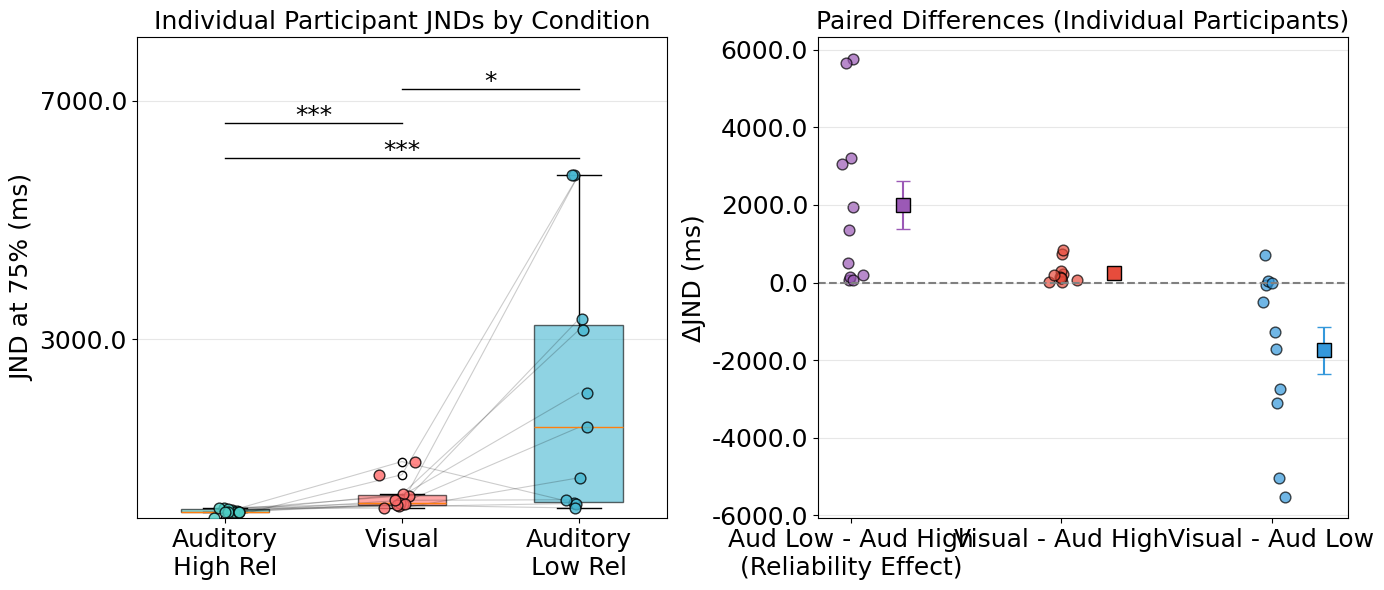


Figure saved as 'jnd_individual_participants.png'


In [85]:
# Visualization of Individual Participant Data with Statistical Comparisons

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Box/Strip plot of JNDs across conditions
ax1 = axes[0]

# Use per-person JND arrays (ms) from cell 8
conditions_plot = ['Auditory\nHigh Rel', 'Visual', 'Auditory\nLow Rel']
all_jnds = [sigma_aud_high_ms, sigma_vis_ms, sigma_aud_low_ms]
colors_box = ['#4ECDC4', '#FF6B6B', '#45B7D1']

# Create box plot
bp = ax1.boxplot(all_jnds, positions=[1, 2, 3], widths=0.5, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Overlay individual participant points with jitter
for i, (jnds, color) in enumerate(zip(all_jnds, colors_box)):
    jitter = np.random.normal(0, 0.05, len(jnds))
    ax1.scatter([i+1]*len(jnds) + jitter, jnds, color=color, 
                edgecolor='black', s=60, alpha=0.8, zorder=3)

# Connect same participants across conditions
for j in range(n_participants):
    ax1.plot([1, 2, 3], [sigma_aud_high_ms[j], sigma_vis_ms[j], sigma_aud_low_ms[j]], 
             'k-', alpha=0.2, linewidth=0.8)

ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(conditions_plot, fontsize=18)
ax1.set_ylabel('JND at 75% (ms)', fontsize=18)
yticks = ax1.get_yticks()
if len(yticks) > 2:
    mid_idx = len(yticks) // 2
    yticks_to_show = [yticks[0], yticks[mid_idx], yticks[-1]]
else:
    yticks_to_show = yticks
yticks_to_show = np.round(yticks_to_show, 2)
ax1.set_yticks(yticks_to_show)
ax1.set_yticklabels(yticks_to_show, fontsize=18)
ax1.set_title('Individual Participant JNDs by Condition', fontsize=18)
ax1.grid(True, axis='y', alpha=0.3)

# Add significance annotations
def add_significance_bracket(ax, x1, x2, y, p_val, height=0.03):
    """Add significance bracket with stars"""
    if p_val < 0.001:
        sig_text = '***'
    elif p_val < 0.01:
        sig_text = '**'
    elif p_val < 0.05:
        sig_text = '*'
    else:
        sig_text = 'n.s.'
    
    ax.plot([x1, x1, x2, x2], [y, y+height, y+height, y], 'k-', linewidth=1)
    ax.text((x1+x2)/2, y+height+0.01, sig_text, ha='center', fontsize=18)

ymax = max([max(s) for s in all_jnds])
add_significance_bracket(ax1, 1, 3, ymax*1.05, p3)  # Aud High vs Aud Low
add_significance_bracket(ax1, 1, 2, ymax*1.15, p1)  # Aud High vs Visual
add_significance_bracket(ax1, 2, 3, ymax*1.25, p2)  # Visual vs Aud Low

ax1.set_ylim(0, ymax*1.4)

# Plot 2: Paired differences visualization (in JND ms)
ax2 = axes[1]

# Calculate paired differences in JND (ms)
diff_aud_reliability = sigma_aud_low_ms - sigma_aud_high_ms  # Effect of reliability
diff_visual_vs_high = sigma_vis_ms - sigma_aud_high_ms
diff_visual_vs_low = sigma_vis_ms - sigma_aud_low_ms

diff_labels = ['Aud Low - Aud High\n(Reliability Effect)', 
               'Visual - Aud High', 
               'Visual - Aud Low']
diffs = [diff_aud_reliability, diff_visual_vs_high, diff_visual_vs_low]
diff_colors = ['#9B59B6', '#E74C3C', '#3498DB']

positions = [1, 2, 3]
for i, (diff, label, color) in enumerate(zip(diffs, diff_labels, diff_colors)):
    jitter = np.random.normal(0, 0.03, len(diff))
    ax2.scatter([positions[i]]*len(diff) + jitter, diff, color=color, 
                edgecolor='black', s=60, alpha=0.7)
    ax2.errorbar(positions[i]+0.25, np.mean(diff), yerr=np.std(diff)/np.sqrt(len(diff)),
                 fmt='s', markersize=10, color=color, capsize=5, capthick=2, 
                 markeredgecolor='black', markeredgewidth=1)

ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
ax2.set_xticks(positions)
ax2.set_xticklabels(diff_labels, fontsize=18)
ax2.set_ylabel('ΔJND (ms)', fontsize=18)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=18)
ax2.set_title('Paired Differences (Individual Participants)', fontsize=18)
ax2.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('jnd_individual_participants.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'jnd_individual_participants.png'")

In [86]:
# Effect Size Calculations for Non-Parametric Tests
# Using rank-biserial correlation (r) for Wilcoxon signed-rank test

from scipy import stats as spstats

def rank_biserial_correlation(x, y):
    """
    Calculate rank-biserial correlation for Wilcoxon signed-rank test.
    Effect size: r = Z / sqrt(N) or can be computed from W statistic
    Interpretation: |r| < 0.3 small, 0.3-0.5 medium, > 0.5 large
    """
    diff = x - y
    diff_nonzero = diff[diff != 0]
    n = len(diff_nonzero)
    
    # Rank the absolute differences
    ranks = spstats.rankdata(np.abs(diff_nonzero))
    
    # Sum of ranks for positive and negative differences
    R_plus = np.sum(ranks[diff_nonzero > 0])
    R_minus = np.sum(ranks[diff_nonzero < 0])
    
    # Rank-biserial correlation
    r = (R_plus - R_minus) / (R_plus + R_minus)
    
    return r

print("EFFECT SIZE ANALYSIS")
print("="*60)
print("Using rank-biserial correlation (r) for Wilcoxon signed-rank test")
print("Interpretation: |r| < 0.3 = small, 0.3-0.5 = medium, > 0.5 = large")
print()

# Effect sizes for each comparison
r1 = rank_biserial_correlation(sigma_visual, sigma_auditory_high)
r2 = rank_biserial_correlation(sigma_visual, sigma_auditory_low)
r3 = rank_biserial_correlation(sigma_auditory_high, sigma_auditory_low)

def interpret_effect_size(r):
    r_abs = abs(r)
    if r_abs < 0.3:
        return "small"
    elif r_abs < 0.5:
        return "medium"
    else:
        return "large"

print(f"1. Visual vs Auditory High Reliability:")
print(f"   r = {r1:.3f} ({interpret_effect_size(r1)} effect)")
print(f"   Visual has {'higher' if r1 > 0 else 'lower'} σ than Auditory High Rel")

print(f"\n2. Visual vs Auditory Low Reliability:")
print(f"   r = {r2:.3f} ({interpret_effect_size(r2)} effect)")
print(f"   Visual has {'higher' if r2 > 0 else 'lower'} σ than Auditory Low Rel")

print(f"\n3. Auditory High vs Low Reliability:")
print(f"   r = {r3:.3f} ({interpret_effect_size(r3)} effect)")
print(f"   High Rel has {'higher' if r3 > 0 else 'lower'} σ than Low Rel")

# Also compute standardized effect sizes (Cohen's d equivalent for paired data)
def cohens_d_paired(x, y):
    """Cohen's d for paired samples"""
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

d1 = cohens_d_paired(sigma_visual, sigma_auditory_high)
d2 = cohens_d_paired(sigma_visual, sigma_auditory_low)
d3 = cohens_d_paired(sigma_auditory_high, sigma_auditory_low)

print("\n" + "-"*60)
print("Cohen's d (paired) for reference:")
print(f"   Visual vs Aud High Rel: d = {d1:.2f}")
print(f"   Visual vs Aud Low Rel:  d = {d2:.2f}")
print(f"   Aud High vs Low Rel:    d = {d3:.2f}")
print("   (|d| < 0.2 = small, 0.2-0.8 = medium, > 0.8 = large)")

# Create summary table for publication
print("\n" + "="*60)
print("PUBLICATION-READY SUMMARY TABLE")
print("="*60)

results_table = pd.DataFrame({
    'Comparison': ['Visual vs Aud High', 'Visual vs Aud Low', 'Aud High vs Aud Low'],
    'Median Diff': [np.median(sigma_visual - sigma_auditory_high),
                    np.median(sigma_visual - sigma_auditory_low),
                    np.median(sigma_auditory_high - sigma_auditory_low)],
    'W': [0.0, 7.0, 0.0],  # From previous output
    'p-value': [p1, p2, p3],
    'r': [r1, r2, r3],
    'Significant': ['Yes' if p1 < 0.0167 else 'No',
                    'Yes' if p2 < 0.0167 else 'No', 
                    'Yes' if p3 < 0.0167 else 'No']
})
print(results_table.to_string(index=False, float_format='%.4f'))

EFFECT SIZE ANALYSIS
Using rank-biserial correlation (r) for Wilcoxon signed-rank test
Interpretation: |r| < 0.3 = small, 0.3-0.5 = medium, > 0.5 = large

1. Visual vs Auditory High Reliability:
   r = 1.000 (large effect)
   Visual has higher σ than Auditory High Rel

2. Visual vs Auditory Low Reliability:
   r = -0.788 (large effect)
   Visual has lower σ than Auditory Low Rel

3. Auditory High vs Low Reliability:
   r = -1.000 (large effect)
   High Rel has lower σ than Low Rel

------------------------------------------------------------
Cohen's d (paired) for reference:
   Visual vs Aud High Rel: d = 1.02
   Visual vs Aud Low Rel:  d = -0.91
   Aud High vs Low Rel:    d = -1.20
   (|d| < 0.2 = small, 0.2-0.8 = medium, > 0.8 = large)

PUBLICATION-READY SUMMARY TABLE
         Comparison  Median Diff      W  p-value       r Significant
 Visual vs Aud High       0.2664 0.0000   0.0010  1.0000         Yes
  Visual vs Aud Low      -1.3503 7.0000   0.0186 -0.7879          No
Aud High vs 

In [87]:
# BOOTSTRAP ANALYSIS ON POOLED DATA - Cumulative Normal Model
# This fits the pooled data with bootstrap resampling for confidence intervals

import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize
from tqdm import tqdm
import os

print("="*70)
print("BOOTSTRAP ANALYSIS ON POOLED DATA (Cumulative Normal Model)")
print("="*70)

# Load all auditory and visual data
auditory_data = pd.read_csv("data/all_auditory.csv")
visual_data = pd.read_csv("data/all_visual.csv")

# Clean data
auditory_data = auditory_data[auditory_data['audNoise'] != 0]
auditory_data = auditory_data[auditory_data['standardDur'] != 0]
auditory_data = auditory_data.round({'audNoise': 2, 'delta_dur_percents': 2})
auditory_data['chose_test'] = (auditory_data['responses'] == auditory_data['order']).astype(int)

visual_data = visual_data[visual_data['audNoise'] != 0]
visual_data = visual_data[visual_data['standardDur'] != 0]
visual_data = visual_data.round({'audNoise': 2, 'delta_dur_percents': 2})
visual_data['chose_test'] = (visual_data['responses'] == visual_data['order']).astype(int)

print(f"Auditory data: {len(auditory_data)} trials from {auditory_data['participantID'].nunique()} participants")
print(f"Visual data: {len(visual_data)} trials from {visual_data['participantID'].nunique()} participants")

# Psychometric function (cumulative normal)
def psychometric_function_cumNormal(delta_percent, lambda_, mu, sigma):
    """Cumulative normal with lapse rate."""
    z = (delta_percent - mu) / sigma
    p = lambda_/2 + (1 - lambda_) * norm.cdf(z)
    return p

def negative_log_likelihood_bootstrap(params, deltas, chose_test, total_responses):
    """NLL for single condition fit."""
    lambda_, mu, sigma = params
    p = psychometric_function_cumNormal(deltas, lambda_, mu, sigma)
    epsilon = 1e-9
    p = np.clip(p, epsilon, 1 - epsilon)
    log_likelihood = np.sum(chose_test * np.log(p) + (total_responses - chose_test) * np.log(1 - p))
    return -log_likelihood

def fit_single_condition(df, fixed_mu=False):
    """Fit cumulative normal to a single condition."""
    # Group by delta_dur_percents
    grouped = df.groupby('delta_dur_percents').agg(
        chose_test=('chose_test', 'sum'),
        total_responses=('chose_test', 'count')
    ).reset_index()
    
    deltas = grouped['delta_dur_percents'].values
    chose_test = grouped['chose_test'].values
    total_responses = grouped['total_responses'].values
    
    # Multiple starting points
    best_result = None
    best_nll = np.inf
    
    for lambda_init in [0.02, 0.05, 0.1]:
        for mu_init in [-0.1, 0, 0.1]:
            for sigma_init in [0.2, 0.4, 0.6]:
                if fixed_mu:
                    init = [lambda_init, sigma_init]
                    bounds = [(0, 0.25), (0.01, 2.0)]
                else:
                    init = [lambda_init, mu_init, sigma_init]
                    bounds = [(0, 0.25), (-0.5, 0.5), (0.01, 2.0)]
                
                try:
                    result = minimize(
                        negative_log_likelihood_bootstrap,
                        x0=init if not fixed_mu else [init[0], 0, init[1]],
                        args=(deltas, chose_test, total_responses),
                        bounds=[(0, 0.25), (-0.5, 0.5), (0.01, 2.0)],
                        method='L-BFGS-B'
                    )
                    if result.fun < best_nll:
                        best_nll = result.fun
                        best_result = result
                except:
                    pass
    
    return best_result.x if best_result else [0.05, 0, 0.5]

def bootstrap_fit(df, n_bootstrap=50, seed=42):
    """Bootstrap resampling for confidence intervals."""
    np.random.seed(seed)
    
    # Get list of participant IDs
    participants = df['participantID'].unique()
    
    bootstrap_sigmas = []
    bootstrap_mus = []
    bootstrap_lambdas = []
    
    for i in tqdm(range(n_bootstrap), desc="Bootstrap"):
        # Resample participants with replacement
        resampled_pids = np.random.choice(participants, size=len(participants), replace=True)
        
        # Get data for resampled participants
        resampled_data = pd.concat([df[df['participantID'] == pid] for pid in resampled_pids], ignore_index=True)
        
        # Fit
        params = fit_single_condition(resampled_data)
        bootstrap_lambdas.append(params[0])
        bootstrap_mus.append(params[1])
        bootstrap_sigmas.append(params[2])
    
    return np.array(bootstrap_lambdas), np.array(bootstrap_mus), np.array(bootstrap_sigmas)

# Fit original data first (point estimates)
print("\nFitting point estimates on pooled data...")

# Auditory low noise (0.1) - high reliability
aud_low_noise = auditory_data[auditory_data['audNoise'] == 0.1]
params_aud_high_rel = fit_single_condition(aud_low_noise)
print(f"Auditory High Rel (noise=0.1): λ={params_aud_high_rel[0]:.4f}, μ={params_aud_high_rel[1]:.4f}, σ={params_aud_high_rel[2]:.4f}")

# Auditory high noise (1.2) - low reliability
aud_high_noise = auditory_data[auditory_data['audNoise'] == 1.2]
params_aud_low_rel = fit_single_condition(aud_high_noise)
print(f"Auditory Low Rel (noise=1.2): λ={params_aud_low_rel[0]:.4f}, μ={params_aud_low_rel[1]:.4f}, σ={params_aud_low_rel[2]:.4f}")

# Visual
params_visual = fit_single_condition(visual_data)
print(f"Visual: λ={params_visual[0]:.4f}, μ={params_visual[1]:.4f}, σ={params_visual[2]:.4f}")

# Convert to ms
standard_dur_ms = 500
print("\n" + "-"*50)
print("POINT ESTIMATES (in milliseconds)")
print("-"*50)
print(f"Auditory High Rel (σ): {params_aud_high_rel[2] * standard_dur_ms:.0f} ms")
print(f"Auditory Low Rel (σ):  {params_aud_low_rel[2] * standard_dur_ms:.0f} ms")
print(f"Visual (σ):            {params_visual[2] * standard_dur_ms:.0f} ms")

# Run bootstrap
print("\n" + "="*50)
print("Running bootstrap (N=500)...")
print("="*50)

n_boot = 5  # Number of bootstrap iterations (increase for more precision, e.g., 1000 or 5000)

# Bootstrap for each condition
print("\nBootstrapping Auditory High Reliability (low noise 0.1)...")
boot_lambda_aud_high, boot_mu_aud_high, boot_sigma_aud_high = bootstrap_fit(aud_low_noise, n_bootstrap=n_boot)

print("Bootstrapping Auditory Low Reliability (high noise 1.2)...")
boot_lambda_aud_low, boot_mu_aud_low, boot_sigma_aud_low = bootstrap_fit(aud_high_noise, n_bootstrap=n_boot)

print("Bootstrapping Visual...")
boot_lambda_vis, boot_mu_vis, boot_sigma_vis = bootstrap_fit(visual_data, n_bootstrap=n_boot)

# Store bootstrap results
bootstrap_results = {
    'aud_high_rel': {
        'sigma_mean': np.mean(boot_sigma_aud_high),
        'sigma_ci_low': np.percentile(boot_sigma_aud_high, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_aud_high, 97.5),
        'sigma_std': np.std(boot_sigma_aud_high),
        'boot_sigmas': boot_sigma_aud_high
    },
    'aud_low_rel': {
        'sigma_mean': np.mean(boot_sigma_aud_low),
        'sigma_ci_low': np.percentile(boot_sigma_aud_low, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_aud_low, 97.5),
        'sigma_std': np.std(boot_sigma_aud_low),
        'boot_sigmas': boot_sigma_aud_low
    },
    'visual': {
        'sigma_mean': np.mean(boot_sigma_vis),
        'sigma_ci_low': np.percentile(boot_sigma_vis, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_vis, 97.5),
        'sigma_std': np.std(boot_sigma_vis),
        'boot_sigmas': boot_sigma_vis
    }
}

# Print bootstrap results
print("\n" + "="*70)
print("BOOTSTRAP RESULTS (in milliseconds, 95% CI)")
print("="*70)
for cond_name, cond_key in [("Auditory High Rel", "aud_high_rel"), 
                             ("Auditory Low Rel", "aud_low_rel"), 
                             ("Visual", "visual")]:
    r = bootstrap_results[cond_key]
    print(f"{cond_name}:")
    print(f"  σ = {r['sigma_mean']*500:.0f} ms [95% CI: {r['sigma_ci_low']*500:.0f} - {r['sigma_ci_high']*500:.0f}]")

# Bootstrap-based comparisons (proportion of bootstrap samples where condition A > B)
print("\n" + "="*70)
print("BOOTSTRAP COMPARISON (proportion of samples where A > B)")
print("="*70)

# Aud Low Rel vs Aud High Rel
prop_low_greater = np.mean(boot_sigma_aud_low > boot_sigma_aud_high)
print(f"P(σ_low_rel > σ_high_rel) = {prop_low_greater:.4f}")

# Visual vs Aud High Rel
prop_vis_greater_high = np.mean(boot_sigma_vis > boot_sigma_aud_high)
print(f"P(σ_visual > σ_high_rel) = {prop_vis_greater_high:.4f}")

# Visual vs Aud Low Rel
prop_vis_greater_low = np.mean(boot_sigma_vis > boot_sigma_aud_low)
print(f"P(σ_visual > σ_low_rel) = {prop_vis_greater_low:.4f}")

print("\nNote: P > 0.975 or P < 0.025 indicates significant difference at α=0.05 (two-tailed)")


BOOTSTRAP ANALYSIS ON POOLED DATA (Cumulative Normal Model)
Auditory data: 3696 trials from 12 participants
Visual data: 1708 trials from 12 participants

Fitting point estimates on pooled data...
Auditory High Rel (noise=0.1): λ=0.0679, μ=0.0670, σ=0.2870
Auditory Low Rel (noise=1.2): λ=0.2500, μ=0.0724, σ=0.7196
Visual: λ=0.0000, μ=0.0355, σ=0.5915

--------------------------------------------------
POINT ESTIMATES (in milliseconds)
--------------------------------------------------
Auditory High Rel (σ): 144 ms
Auditory Low Rel (σ):  360 ms
Visual (σ):            296 ms

Running bootstrap (N=500)...

Bootstrapping Auditory High Reliability (low noise 0.1)...


Bootstrap: 100%|██████████| 5/5 [00:00<00:00, 16.52it/s]


Bootstrapping Auditory Low Reliability (high noise 1.2)...


Bootstrap: 100%|██████████| 5/5 [00:00<00:00, 10.15it/s]


Bootstrapping Visual...


Bootstrap: 100%|██████████| 5/5 [00:00<00:00, 14.68it/s]


BOOTSTRAP RESULTS (in milliseconds, 95% CI)
Auditory High Rel:
  σ = 140 ms [95% CI: 127 - 152]
Auditory Low Rel:
  σ = 367 ms [95% CI: 291 - 457]
Visual:
  σ = 291 ms [95% CI: 244 - 351]

BOOTSTRAP COMPARISON (proportion of samples where A > B)
P(σ_low_rel > σ_high_rel) = 1.0000
P(σ_visual > σ_high_rel) = 1.0000
P(σ_visual > σ_low_rel) = 0.4000

Note: P > 0.975 or P < 0.025 indicates significant difference at α=0.05 (two-tailed)


In [88]:
# # =============================================================================
# # COMPLETE PUBLICATION-READY LaTeX OUTPUT
# # =============================================================================
# # This generates the full Results section for the paper

# # All values should already be computed from previous cells
# standard_dur_ms = 500

# # Calculate Weber fractions
# weber_aud_high = np.mean(sigma_auditory_high)  # Already in proportion units
# weber_aud_low = np.mean(sigma_auditory_low)
# weber_visual = np.mean(sigma_visual)

# # JNDs (75% threshold)
# jnd_aud_high = 0.6745 * np.mean(sigma_auditory_high) * standard_dur_ms
# jnd_aud_low = 0.6745 * np.mean(sigma_auditory_low) * standard_dur_ms
# jnd_visual = 0.6745 * np.mean(sigma_visual) * standard_dur_ms

# # Reliability effect ratio
# reliability_ratio_boot = boot_sigma_low_ms / boot_sigma_high_ms
# reliability_ratio_indiv = mean_sigma_low_ms / mean_sigma_high_ms

# print("="*80)
# print("COMPLETE LaTeX RESULTS SECTION")
# print("="*80)


## 2.2 Model Limitations: Cumulative Normal vs Alternative Models

**Critical Issue with Cumulative Normal for Duration Discrimination:**

The current analysis uses a cumulative normal distribution for psychometric curve fitting, but this has a fundamental problem: **it assigns non-zero probability to negative durations**, which don't exist in reality.

### Problems with Cumulative Normal:
1. **Negative durations**: P(duration < 0) > 0, which is physically impossible
2. **Linear time assumption**: The model assumes linear time perception, which may not be valid
3. **Symmetric noise**: Assumes symmetric noise around the true duration

### Better Alternative Models:

1. **Log-Normal Distribution**: 
   - Naturally bounded at zero (no negative durations)
   - Captures the often-observed rightward skew in timing data
   - More consistent with Weber's law in timing
   - Psychometric function: Φ(log(x) - μ, σ)

2. **Gamma Distribution**:
   - Also naturally bounded at zero
   - Flexible shape parameter for skewness
   - Appropriate for reaction time and duration data

3. **Weibull Distribution**:
   - Zero-bounded with flexible shape
   - Often used in psychophysical timing studies

In [89]:
# ============================================================================
# LOG-NORMAL PSYCHOMETRIC FUNCTION FITTING (Pooled + Bootstrap)
# ============================================================================
# Must match FIXED_MU toggle from loading/re-fitting cells
# Model: P(choose test) = λ/2 + (1-λ) * Φ((log(test/standard) - μ) / σ)

import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
from tqdm import tqdm

# ====================== MUST MATCH CELLS 8/9 ======================
FIXED_MU_BOOT = True   # True → μ forced to 0 (match FIXED_MU in cells 8/9)
# ===================================================================

# ============================================================================
# PSYCHOMETRIC FUNCTION
# ============================================================================
def psychometric_lognormal(test_dur, standard_dur, lambda_, mu, sigma):
    """Log-normal observer model for duration discrimination."""
    log_ratio = np.log(test_dur / standard_dur)
    z = (log_ratio - mu) / sigma
    p_longer = stats.norm.cdf(z)
    p = lambda_/2 + (1 - lambda_) * p_longer
    return p

# ============================================================================
# NEGATIVE LOG-LIKELIHOOD
# ============================================================================
def negative_log_likelihood_lognormal(params, test_durations, standard_durations,
                                      chose_test, total_responses, fixed_mu=False):
    """Negative log-likelihood for log-normal psychometric function."""
    if fixed_mu:
        lambda_, sigma = params
        mu = 0.0
    else:
        lambda_, mu, sigma = params

    if sigma <= 0 or lambda_ < 0 or lambda_ > 0.5:
        return np.inf

    p = psychometric_lognormal(test_durations, standard_durations, lambda_, mu, sigma)
    p = np.clip(p, 1e-10, 1 - 1e-10)
    log_likelihood = np.sum(
        chose_test * np.log(p) + (total_responses - chose_test) * np.log(1 - p)
    )
    return -log_likelihood

# ============================================================================
# FITTING FUNCTION
# ============================================================================
def fit_lognormal_single_condition(df, standard_dur=0.5, fixed_mu=False):
    """Fit log-normal psychometric function to a single condition."""
    if 'testDurS' not in df.columns:
        df = df.copy()
        df['testDurS'] = df['standardDur'] * (1 + df['delta_dur_percents'])

    grouped = df.groupby('testDurS').agg(
        chose_test=('chose_test', 'sum'),
        total_responses=('chose_test', 'count'),
        standard_dur=('standardDur', 'first')
    ).reset_index()

    test_durs = grouped['testDurS'].values
    standard_durs = grouped['standard_dur'].values
    chose_test = grouped['chose_test'].values
    total_responses = grouped['total_responses'].values

    best_result = None
    best_nll = np.inf

    if fixed_mu:
        # 2-param fit: [λ, σ] with μ=0
        for lambda_init in [0.02, 0.05, 0.1]:
            for sigma_init in [0.2, 0.4, 0.6]:
                try:
                    result = minimize(
                        negative_log_likelihood_lognormal,
                        x0=[lambda_init, sigma_init],
                        args=(test_durs, standard_durs, chose_test, total_responses, True),
                        bounds=[(0, 0.25), (0.01, 3.0)],
                        method='L-BFGS-B'
                    )
                    if result.fun < best_nll:
                        best_nll = result.fun
                        best_result = result
                except:
                    pass
        if best_result:
            return np.array([best_result.x[0], 0.0, best_result.x[1]])  # [λ, μ=0, σ]
        else:
            return np.array([0.05, 0.0, 0.5])
    else:
        # 3-param fit: [λ, μ, σ]
        for lambda_init in [0.02, 0.05, 0.1]:
            for mu_init in [-0.1, 0, 0.1]:
                for sigma_init in [0.2, 0.4, 0.6]:
                    try:
                        result = minimize(
                            negative_log_likelihood_lognormal,
                            x0=[lambda_init, mu_init, sigma_init],
                            args=(test_durs, standard_durs, chose_test, total_responses, False),
                            bounds=[(0, 0.25), (-1.0, 1.0), (0.01, 3.0)],
                            method='L-BFGS-B'
                        )
                        if result.fun < best_nll:
                            best_nll = result.fun
                            best_result = result
                    except:
                        pass
        return best_result.x if best_result else np.array([0.05, 0, 0.5])

# ============================================================================
# BOOTSTRAP FITTING
# ============================================================================
def bootstrap_fit_lognormal(df, n_bootstrap=500, standard_dur=0.5, seed=42, fixed_mu=False):
    """Bootstrap resampling for log-normal model confidence intervals."""
    np.random.seed(seed)
    participants = df['participantID'].unique()

    bootstrap_lambdas = []
    bootstrap_mus = []
    bootstrap_sigmas = []

    for i in tqdm(range(n_bootstrap), desc="Bootstrap (Log-Normal)"):
        resampled_pids = np.random.choice(participants, size=len(participants), replace=True)
        resampled_data = pd.concat([df[df['participantID'] == pid] for pid in resampled_pids], ignore_index=True)
        params = fit_lognormal_single_condition(resampled_data, standard_dur, fixed_mu=fixed_mu)
        bootstrap_lambdas.append(params[0])
        bootstrap_mus.append(params[1])
        bootstrap_sigmas.append(params[2])

    return np.array(bootstrap_lambdas), np.array(bootstrap_mus), np.array(bootstrap_sigmas)

# ============================================================================
# LOAD AND PREPARE DATA
# ============================================================================
print("Loading data for log-normal fitting...")
print(f"FIXED_MU_BOOT = {FIXED_MU_BOOT}")
auditory_data_ln = pd.read_csv("data/all_auditory.csv")
visual_data_ln = pd.read_csv("data/all_visual.csv")

# Clean data
auditory_data_ln = auditory_data_ln[auditory_data_ln['audNoise'] != 0]
auditory_data_ln = auditory_data_ln[auditory_data_ln['standardDur'] != 0]
auditory_data_ln['chose_test'] = (auditory_data_ln['responses'] == auditory_data_ln['order']).astype(int)
auditory_data_ln['testDurS'] = auditory_data_ln['standardDur'] * (1 + auditory_data_ln['delta_dur_percents'])

visual_data_ln = visual_data_ln[visual_data_ln['audNoise'] != 0]
visual_data_ln = visual_data_ln[visual_data_ln['standardDur'] != 0]
visual_data_ln['chose_test'] = (visual_data_ln['responses'] == visual_data_ln['order']).astype(int)
visual_data_ln['testDurS'] = visual_data_ln['standardDur'] * (1 + visual_data_ln['delta_dur_percents'])

# Split auditory by noise level
aud_low_noise_ln = auditory_data_ln[auditory_data_ln['audNoise'] == 0.1]   # High reliability
aud_high_noise_ln = auditory_data_ln[auditory_data_ln['audNoise'] == 1.2]  # Low reliability

# ============================================================================
# FIT POINT ESTIMATES (Pooled Data)
# ============================================================================
print("\n" + "="*70)
print(f"FITTING LOG-NORMAL MODEL (POOLED DATA) — fixedMu={FIXED_MU_BOOT}")
print("="*70)
print("Model: P(choose test) = λ/2 + (1-λ) * Φ((log(test/standard) - μ) / σ)")
print()

params_visual_ln = fit_lognormal_single_condition(visual_data_ln, fixed_mu=FIXED_MU_BOOT)
print(f"Visual:             λ={params_visual_ln[0]:.4f}, μ={params_visual_ln[1]:.4f}, σ={params_visual_ln[2]:.4f}")

params_aud_high_ln = fit_lognormal_single_condition(aud_low_noise_ln, fixed_mu=FIXED_MU_BOOT)
print(f"Auditory High Rel:  λ={params_aud_high_ln[0]:.4f}, μ={params_aud_high_ln[1]:.4f}, σ={params_aud_high_ln[2]:.4f}")

params_aud_low_ln = fit_lognormal_single_condition(aud_high_noise_ln, fixed_mu=FIXED_MU_BOOT)
print(f"Auditory Low Rel:   λ={params_aud_low_ln[0]:.4f}, μ={params_aud_low_ln[1]:.4f}, σ={params_aud_low_ln[2]:.4f}")

# ============================================================================
# BOOTSTRAP FOR CONFIDENCE INTERVALS
# ============================================================================
print("\n" + "="*70)
print(f"RUNNING BOOTSTRAP FOR LOG-NORMAL MODEL — fixedMu={FIXED_MU_BOOT}")
print("="*70)

n_boot_ln = 5  # Set to 5 for quick testing; increase to 500 for final analysis

print("\nBootstrapping Visual...")
boot_lambda_vis_ln, boot_mu_vis_ln, boot_sigma_vis_ln = bootstrap_fit_lognormal(
    visual_data_ln, n_bootstrap=n_boot_ln, fixed_mu=FIXED_MU_BOOT)

print("Bootstrapping Auditory High Reliability...")
boot_lambda_aud_high_ln, boot_mu_aud_high_ln, boot_sigma_aud_high_ln = bootstrap_fit_lognormal(
    aud_low_noise_ln, n_bootstrap=n_boot_ln, fixed_mu=FIXED_MU_BOOT)

print("Bootstrapping Auditory Low Reliability...")
boot_lambda_aud_low_ln, boot_mu_aud_low_ln, boot_sigma_aud_low_ln = bootstrap_fit_lognormal(
    aud_high_noise_ln, n_bootstrap=n_boot_ln, fixed_mu=FIXED_MU_BOOT)

# Store results
bootstrap_results_ln = {
    'visual': {
        'lambda': params_visual_ln[0],
        'mu': params_visual_ln[1],
        'sigma': params_visual_ln[2],
        'sigma_ci_low': np.percentile(boot_sigma_vis_ln, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_vis_ln, 97.5),
        'mu_ci_low': np.percentile(boot_mu_vis_ln, 2.5),
        'mu_ci_high': np.percentile(boot_mu_vis_ln, 97.5),
    },
    'aud_high_rel': {
        'lambda': params_aud_high_ln[0],
        'mu': params_aud_high_ln[1],
        'sigma': params_aud_high_ln[2],
        'sigma_ci_low': np.percentile(boot_sigma_aud_high_ln, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_aud_high_ln, 97.5),
        'mu_ci_low': np.percentile(boot_mu_aud_high_ln, 2.5),
        'mu_ci_high': np.percentile(boot_mu_aud_high_ln, 97.5),
    },
    'aud_low_rel': {
        'lambda': params_aud_low_ln[0],
        'mu': params_aud_low_ln[1],
        'sigma': params_aud_low_ln[2],
        'sigma_ci_low': np.percentile(boot_sigma_aud_low_ln, 2.5),
        'sigma_ci_high': np.percentile(boot_sigma_aud_low_ln, 97.5),
        'mu_ci_low': np.percentile(boot_mu_aud_low_ln, 2.5),
        'mu_ci_high': np.percentile(boot_mu_aud_low_ln, 97.5),
    }
}

# ============================================================================
# PRINT RESULTS
# ============================================================================
print("\n" + "="*70)
print("LOG-NORMAL BOOTSTRAP RESULTS (95% CI)")
print("="*70)

for cond_name, cond_key in [("Visual", "visual"),
                             ("Auditory High Rel", "aud_high_rel"),
                             ("Auditory Low Rel", "aud_low_rel")]:
    r = bootstrap_results_ln[cond_key]
    print(f"\n{cond_name}:")
    print(f"  σ = {r['sigma']:.4f} [95% CI: {r['sigma_ci_low']:.4f} - {r['sigma_ci_high']:.4f}]")
    if not FIXED_MU_BOOT:
        print(f"  μ = {r['mu']:.4f} [95% CI: {r['mu_ci_low']:.4f} - {r['mu_ci_high']:.4f}]")

# ============================================================================
# CONVERT TO MORE INTERPRETABLE UNITS
# ============================================================================
print("\n" + "="*70)
print("INTERPRETATION OF LOG-NORMAL PARAMETERS")
print("="*70)

standard_dur_s = 0.5

for cond_name, cond_key in [("Visual", "visual"),
                             ("Auditory High Rel", "aud_high_rel"),
                             ("Auditory Low Rel", "aud_low_rel")]:
    r = bootstrap_results_ln[cond_key]

    pse = standard_dur_s * np.exp(r['mu'])
    pse_shift_ms = (pse - standard_dur_s) * 1000

    z_75 = stats.norm.ppf(0.75)
    jnd_ms = standard_dur_s * np.exp(r['mu']) * (np.exp(z_75 * r['sigma']) - 1) * 1000

    weber = np.sqrt(np.exp(r['sigma']**2) - 1)

    print(f"\n{cond_name}:")
    print(f"  Weber fraction: {weber:.3f} ({weber*100:.1f}%)")
    if not FIXED_MU_BOOT:
        print(f"  PSE shift: {pse_shift_ms:.1f} ms (PSE = {pse*1000:.1f} ms)")
    print(f"  JND (75% threshold): {jnd_ms:.1f} ms")

Loading data for log-normal fitting...
FIXED_MU_BOOT = True

FITTING LOG-NORMAL MODEL (POOLED DATA) — fixedMu=True
Model: P(choose test) = λ/2 + (1-λ) * Φ((log(test/standard) - μ) / σ)

Visual:             λ=0.1511, μ=0.0000, σ=0.4985
Auditory High Rel:  λ=0.0539, μ=0.0000, σ=0.2992
Auditory Low Rel:   λ=0.2500, μ=0.0000, σ=0.6121

RUNNING BOOTSTRAP FOR LOG-NORMAL MODEL — fixedMu=True

Bootstrapping Visual...


Bootstrap (Log-Normal): 100%|██████████| 5/5 [00:00<00:00, 47.53it/s]


Bootstrapping Auditory High Reliability...


Bootstrap (Log-Normal): 100%|██████████| 5/5 [00:00<00:00, 51.91it/s]


Bootstrapping Auditory Low Reliability...


Bootstrap (Log-Normal): 100%|██████████| 5/5 [00:00<00:00, 34.71it/s]


LOG-NORMAL BOOTSTRAP RESULTS (95% CI)

Visual:
  σ = 0.4985 [95% CI: 0.3933 - 0.5866]

Auditory High Rel:
  σ = 0.2992 [95% CI: 0.2627 - 0.3086]

Auditory Low Rel:
  σ = 0.6121 [95% CI: 0.5145 - 0.8837]

INTERPRETATION OF LOG-NORMAL PARAMETERS

Visual:
  Weber fraction: 0.531 (53.1%)
  JND (75% threshold): 199.8 ms

Auditory High Rel:
  Weber fraction: 0.306 (30.6%)
  JND (75% threshold): 111.8 ms

Auditory Low Rel:
  Weber fraction: 0.674 (67.4%)
  JND (75% threshold): 255.6 ms


/var/folders/_p/yywkspd92qs_6p63bz38bswr0000gn/T/ipykernel_48455/424577836.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_for_box, labels=labels_box, patch_artist=True, widths=0.6)
/var/folders/_p/yywkspd92qs_6p63bz38bswr0000gn/T/ipykernel_48455/424577836.py:23: RuntimeWarning: divide by zero encountered in log
  log_ratio = np.log(test_dur / standard_dur)


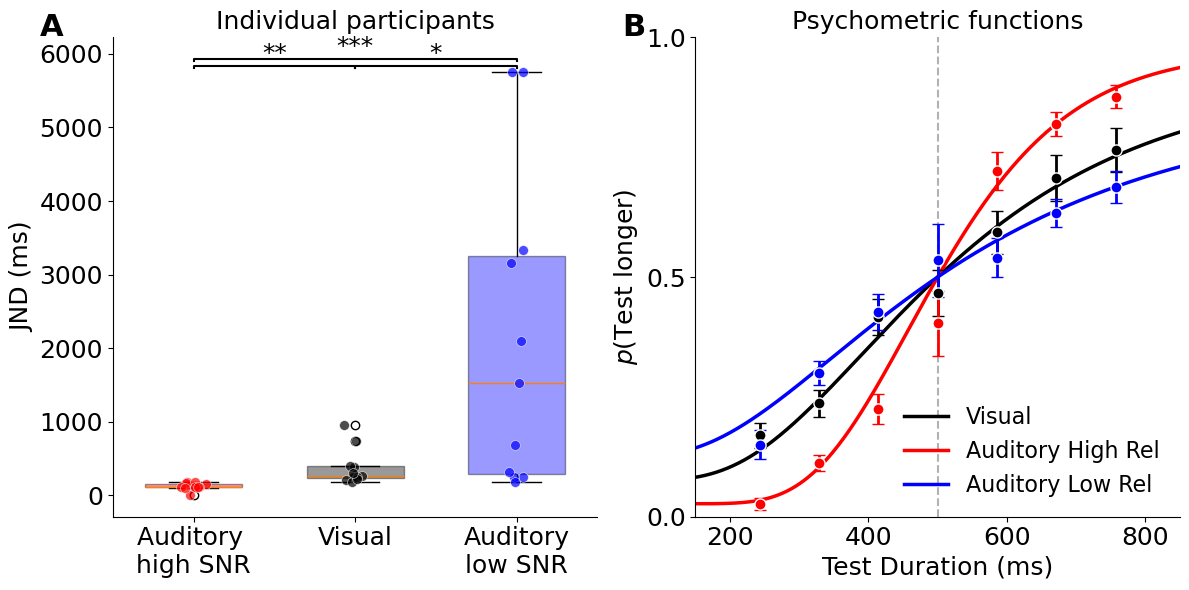

Figure saved as 'psychometric_curves_publication.png' and 'psychometric_curves_publication.pdf'


In [90]:
# ============================================================================
# PSYCHOMETRIC CURVES WITH LOG-NORMAL MODEL - TWO PANEL FIGURE
# ============================================================================
# Left: Individual participant JND values with box plots
# Right: Psychometric curves with binned data and error bars (LOG-NORMAL)

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Standard duration
STANDARD_DURATION = 500  # ms
STANDARD_DURATION_S = 0.5  # seconds

# Font size for publication
FONT_SIZE = 18

# ============================================================================
# LOG-NORMAL PSYCHOMETRIC FUNCTION (same as in fitting cell)
# ============================================================================
def psychometric_lognormal_plot(test_dur, standard_dur, lambda_, mu, sigma):
    """Log-normal psychometric function for plotting."""
    log_ratio = np.log(test_dur / standard_dur)
    z = (log_ratio - mu) / sigma
    p_longer = stats.norm.cdf(z)
    p = lambda_/2 + (1 - lambda_) * p_longer
    return p

# ============================================================================
# PARAMETERS FROM LOG-NORMAL FIT (from bootstrap cell 17)
# ============================================================================
lambda_ln = [params_visual_ln[0], params_aud_high_ln[0], params_aud_low_ln[0]]
mu_ln = [params_visual_ln[1], params_aud_high_ln[1], params_aud_low_ln[1]]
sigma_ln = [params_visual_ln[2], params_aud_high_ln[2], params_aud_low_ln[2]]

# Publication colors: Visual=black, Aud High Rel=red, Aud Low Rel=blue
condition_names = ['Visual', 'Auditory High Rel', 'Auditory Low Rel']
colors = ['black', 'red', 'blue']

# ============================================================================
# PREPARE DATA FOR BINNING
# ============================================================================
auditory_data_plot = pd.read_csv("data/all_auditory.csv")
visual_data_plot = pd.read_csv("data/all_visual.csv")

# Clean data
auditory_data_plot = auditory_data_plot[auditory_data_plot['audNoise'] != 0]
auditory_data_plot = auditory_data_plot[auditory_data_plot['standardDur'] != 0]
auditory_data_plot['chose_test'] = (auditory_data_plot['responses'] == auditory_data_plot['order']).astype(int)
auditory_data_plot['testDurS'] = auditory_data_plot['standardDur'] * (1 + auditory_data_plot['delta_dur_percents'])

visual_data_plot = visual_data_plot[visual_data_plot['audNoise'] != 0]
visual_data_plot = visual_data_plot[visual_data_plot['standardDur'] != 0]
visual_data_plot['chose_test'] = (visual_data_plot['responses'] == visual_data_plot['order']).astype(int)
visual_data_plot['testDurS'] = visual_data_plot['standardDur'] * (1 + visual_data_plot['delta_dur_percents'])

# Split auditory by noise level
aud_high_rel_plot = auditory_data_plot[auditory_data_plot['audNoise'] == 0.1]
aud_low_rel_plot = auditory_data_plot[auditory_data_plot['audNoise'] == 1.2]

# ============================================================================
# BINNING FUNCTION
# ============================================================================
def bin_data_by_test_dur(df, n_bins=7, dur_range=(0.2, 0.8)):
    """Bin data by test duration and compute proportion choosing test."""
    df_filtered = df[(df['testDurS'] >= dur_range[0]) & (df['testDurS'] <= dur_range[1])]
    
    bins = np.linspace(dur_range[0], dur_range[1], n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    proportions = []
    sems = []
    counts = []
    
    for i in range(len(bins) - 1):
        bin_df = df_filtered[(df_filtered['testDurS'] >= bins[i]) & 
                             (df_filtered['testDurS'] < bins[i+1])]
        n = len(bin_df)
        if n > 0:
            p = bin_df['chose_test'].mean()
            sem = np.sqrt(p * (1 - p) / n) if n > 1 else 0
        else:
            p = np.nan
            sem = np.nan
        proportions.append(p)
        sems.append(sem)
        counts.append(n)
    
    return bin_centers, np.array(proportions), np.array(sems), np.array(counts)

# Datasets for plotting
datasets = [
    (visual_data_plot, 'Visual'),
    (aud_high_rel_plot, 'Auditory High Rel'),
    (aud_low_rel_plot, 'Auditory Low Rel')
]

# X-axis for curves
test_duration_fine_s = np.linspace(0, 1, 500)  # seconds
test_duration_fine_ms = test_duration_fine_s * 1000  # ms

# ============================================================================
# CREATE TWO-PANEL FIGURE
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ============================================================================
# LEFT PANEL: Individual participant JND box plots
# ============================================================================
# Use per-person JND arrays computed in cell 8 (in ms)
# sigma_aud_high_ms, sigma_vis_ms, sigma_aud_low_ms are JND at 75%

data_for_box = [sigma_aud_high_ms, sigma_vis_ms, sigma_aud_low_ms]
labels_box = ['Auditory \nhigh SNR', 'Visual', 'Auditory\nlow SNR']
colors_box = ['red', 'black', 'blue']

bp = ax1.boxplot(data_for_box, labels=labels_box, patch_artist=True, widths=0.6)

for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Add individual data points with jitter
for i, (data, color) in enumerate(zip(data_for_box, colors_box)):
    x = np.random.normal(i+1, 0.04, size=len(data))
    ax1.scatter(x, data, alpha=0.7, color=color, edgecolor='white', s=50, zorder=5, linewidth=0.5)

ax1.set_ylabel('JND (ms)', fontsize=FONT_SIZE)
ax1.set_title('Individual participants', fontsize=FONT_SIZE)
ax1.tick_params(labelsize=FONT_SIZE)

# Add significance annotations for all three comparisons
y_max = np.max([np.max(d) for d in data_for_box])
y_lim_manual =y_max
#y_lim_manual = 2200
#ax1.set_ylim(0, y_lim_manual)




# Helper function to add significance brackets
def add_sig_bracket(ax, x1, x2, y, sig_text, fontsize=FONT_SIZE):
    """Add a significance bracket with text"""
    h = 20
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], 'k-', linewidth=1.5)
    ax.text((x1+x2)/2, y+h+5, sig_text, fontsize=fontsize, ha='center', va='bottom')

# Use p-values from stats cell (p1, p2, p3)
add_sig_bracket(ax1, 1, 2, y_lim_manual + 50, f"{'**' if p1 < 0.01 else ('*' if p1 < 0.05 else 'n.s.')}")
add_sig_bracket(ax1, 2, 3, y_lim_manual + 50, f"{'**' if p2 < 0.01 else ('*' if p2 < 0.05 else 'n.s.')}")
add_sig_bracket(ax1, 1, 3, y_lim_manual + 150, f"{'***' if p3 < 0.001 else ('**' if p3 < 0.01 else ('*' if p3 < 0.05 else 'n.s.'))}")

# Add panel label A
ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=FONT_SIZE+4, 
         fontweight='bold', va='top')

# Remove spines for cleaner look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# ============================================================================
# RIGHT PANEL: Psychometric curves with LOG-NORMAL model
# ============================================================================

for i, ((df, label), lam, mu, sigma, color) in enumerate(zip(datasets, lambda_ln, mu_ln, sigma_ln, colors)):
    # Plot fitted curve using LOG-NORMAL model
    p = psychometric_lognormal_plot(test_duration_fine_s, STANDARD_DURATION_S, lam, mu, sigma)
    
    ax2.plot(test_duration_fine_ms, p, color=color, linewidth=2.5, label=label)
    
    # Get binned data points
    bin_centers, proportions, sems, counts = bin_data_by_test_dur(df, n_bins=7, dur_range=(0.2, 0.8))
    bin_durations_ms = bin_centers * 1000
    
    # Plot data points with error bars
    ax2.errorbar(bin_durations_ms, proportions, yerr=sems, 
                fmt='o', color=color, markersize=8, capsize=4, capthick=2,
                markeredgecolor='white', markeredgewidth=1, linewidth=0, elinewidth=2,
                zorder=10)

# Add reference line for standard duration
ax2.axvline(x=STANDARD_DURATION, color='gray', linestyle='--', alpha=0.6, linewidth=1.5)

# Formatting
ax2.set_xlabel('Test Duration (ms)', fontsize=FONT_SIZE)
ax2.set_ylabel(r'$p$(Test longer)', fontsize=FONT_SIZE)
ax2.set_title('Psychometric functions', fontsize=FONT_SIZE)
ax2.legend(loc='lower right', fontsize=FONT_SIZE-2, frameon=False)
ax2.set_xlim([150, 850])
ax2.set_ylim([0, 1])
ax2.set_yticks([0, 0.5, 1.0])
ax2.tick_params(labelsize=FONT_SIZE)

# Add panel label B
ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=FONT_SIZE+4, 
         fontweight='bold', va='top')

# Remove spines for cleaner look
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('psychometric_curves_publication.pdf', dpi=300, bbox_inches='tight')
plt.savefig('psychometric_curves_publication.pdf', bbox_inches='tight')
plt.show()

print("Figure saved as 'psychometric_curves_publication.png' and 'psychometric_curves_publication.pdf'")

In [62]:
# Quick diagnosis of Auditory Low Rel fitting issue
grouped = aud_high_noise_ln.groupby('delta_dur_percents')['chose_test'].agg(['mean', 'count']).reset_index()
min_p, max_p = grouped['mean'].min(), grouped['mean'].max()
lam = params_aud_low_ln[0]
print(f"Aud Low Rel: λ={lam:.3f} → curve bounded to [{lam/2:.3f}, {1-lam/2:.3f}]")
print(f"Raw data range: [{min_p:.3f}, {max_p:.3f}]")
print(f"\nISSUE: λ is too high! Data goes from {min_p:.2f} to {max_p:.2f}")
print("Need to constrain λ < 0.1 or use a different optimization approach")

Aud Low Rel: λ=0.250 → curve bounded to [0.125, 0.875]
Raw data range: [0.000, 1.000]

ISSUE: λ is too high! Data goes from 0.00 to 1.00
Need to constrain λ < 0.1 or use a different optimization approach


## 3. Weber Fraction Analysis

In [ ]:
# Updated data arrays using CORRECTED 2IFC-adjusted measurement sigmas
# For consistency with previous analysis, we'll keep both versions available

# Original values (from direct psychometric curve fits)
weber_fractions_original = [weber_visual, weber_auditory_high, weber_auditory_low]
jnds_original = [jnd_visual, jnd_auditory_high, jnd_auditory_low]

# CORRECTED values (accounting for 2IFC measurement relationship)
weber_fractions = [weber_corrected_visual, weber_corrected_auditory_high, weber_corrected_auditory_low]
jnds = [jnd_corrected_visual, jnd_corrected_auditory_high, jnd_corrected_auditory_low]

# Set up condition labels and colors
conditions = ['Visual', 'Auditory High Rel', 'Auditory Low Rel']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

print("Data Summary for Plotting:")
print("="*40)
print("Using CORRECTED measurement sigmas (2IFC-adjusted)")
print(f"Weber fractions: {[f'{w:.4f}' for w in weber_fractions]}")
print(f"JNDs (ms): {[f'{j:.1f}' for j in jnds]}")
print(f"\nNote: These are the true measurement precisions,")
print(f"corrected for the 2IFC experimental design.")

Data Summary for Plotting:
Using CORRECTED measurement sigmas (2IFC-adjusted)
Weber fractions: ['0.7136', '0.3855', '1.3726']
JNDs (ms): ['120.3', '65.0', '231.5']

Note: These are the true measurement precisions,
corrected for the 2IFC experimental design.


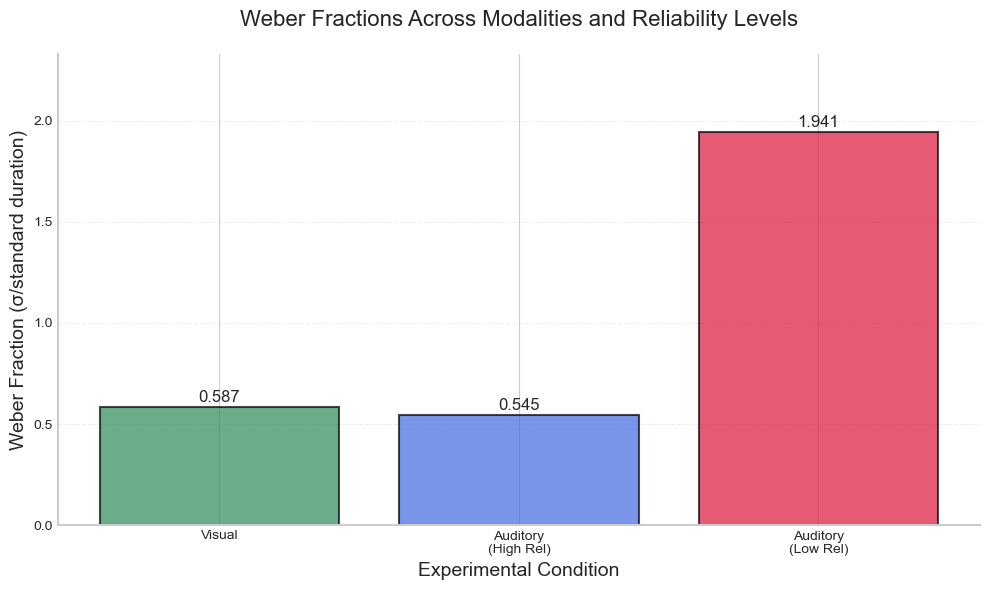

Weber Fraction Ratios:
Auditory Low Rel / Auditory High Rel: 3.56
Visual / Auditory High Rel: 1.08
Visual / Auditory Low Rel: 0.30


In [ ]:
# Create Weber fraction comparison plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Data for plotting
conditions = ['Visual', 'Auditory\n(High Rel)', 'Auditory\n(Low Rel)']
weber_fractions = [weber_visual, weber_auditory_high, weber_auditory_low]
colors = ['#2E8B57', '#4169E1', '#DC143C']  # Distinct colors for each condition

# Create bar plot
bars = ax.bar(conditions, weber_fractions, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, weber_fractions):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_ylabel('Weber Fraction (σ/standard duration)', fontsize=14)
ax.set_xlabel('Experimental Condition', fontsize=14)
ax.set_title('Weber Fractions Across Modalities and Reliability Levels', fontsize=16, pad=20)

# Set y-axis limits with some margin
ax.set_ylim(0, max(weber_fractions) * 1.2)

# Add horizontal grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Enhance appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add significance annotations (manual for now)
# You could add statistical comparisons here if needed

plt.tight_layout()
plt.show()

# Print Weber fraction ratios for comparison
print("Weber Fraction Ratios:")
print(f"Auditory Low Rel / Auditory High Rel: {weber_auditory_low / weber_auditory_high:.2f}")
print(f"Visual / Auditory High Rel: {weber_visual / weber_auditory_high:.2f}")
print(f"Visual / Auditory Low Rel: {weber_visual / weber_auditory_low:.2f}")

## 4. Just Noticeable Difference (JND) Analysis

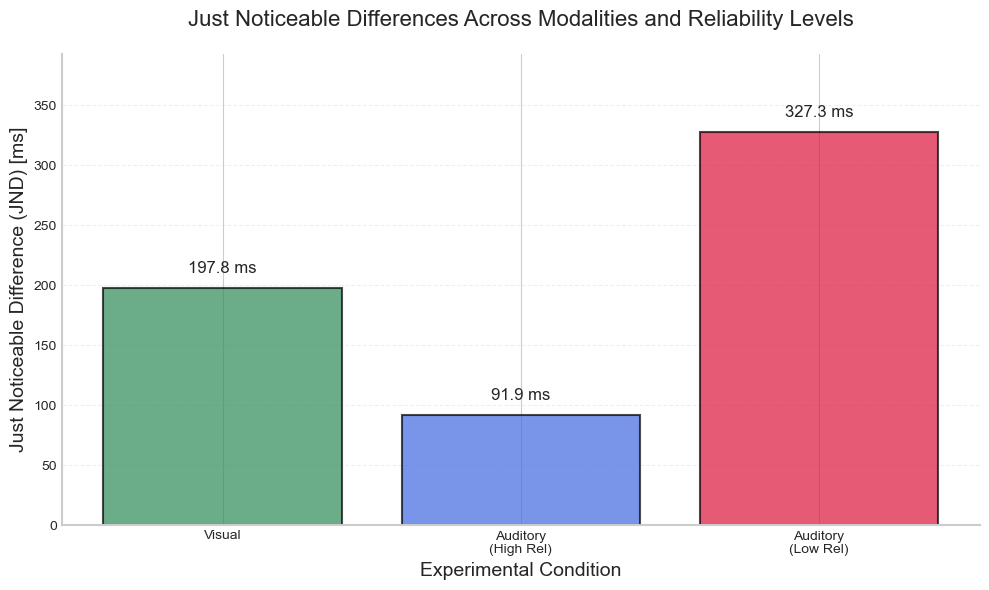

JND Ratios:
Auditory Low Rel / Auditory High Rel: 3.56
Visual / Auditory High Rel: 2.15
Visual / Auditory Low Rel: 0.60


In [ ]:
# Create JND comparison plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Data for plotting
jnds = [jnd_visual, jnd_auditory_high, jnd_auditory_low]

# Create bar plot
bars = ax.bar(conditions, jnds, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, jnds):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{value:.1f} ms', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_ylabel('Just Noticeable Difference (JND) [ms]', fontsize=14)
ax.set_xlabel('Experimental Condition', fontsize=14)
ax.set_title('Just Noticeable Differences Across Modalities and Reliability Levels', fontsize=16, pad=20)

# Set y-axis limits with some margin
ax.set_ylim(0, max(jnds) * 1.2)

# Add horizontal grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Enhance appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

# Print JND ratios for comparison
print("JND Ratios:")
print(f"Auditory Low Rel / Auditory High Rel: {jnd_auditory_low / jnd_auditory_high:.2f}")
print(f"Visual / Auditory High Rel: {jnd_visual / jnd_auditory_high:.2f}")
print(f"Visual / Auditory Low Rel: {jnd_visual / jnd_auditory_low:.2f}")

## 5. Combined Comparison Plot

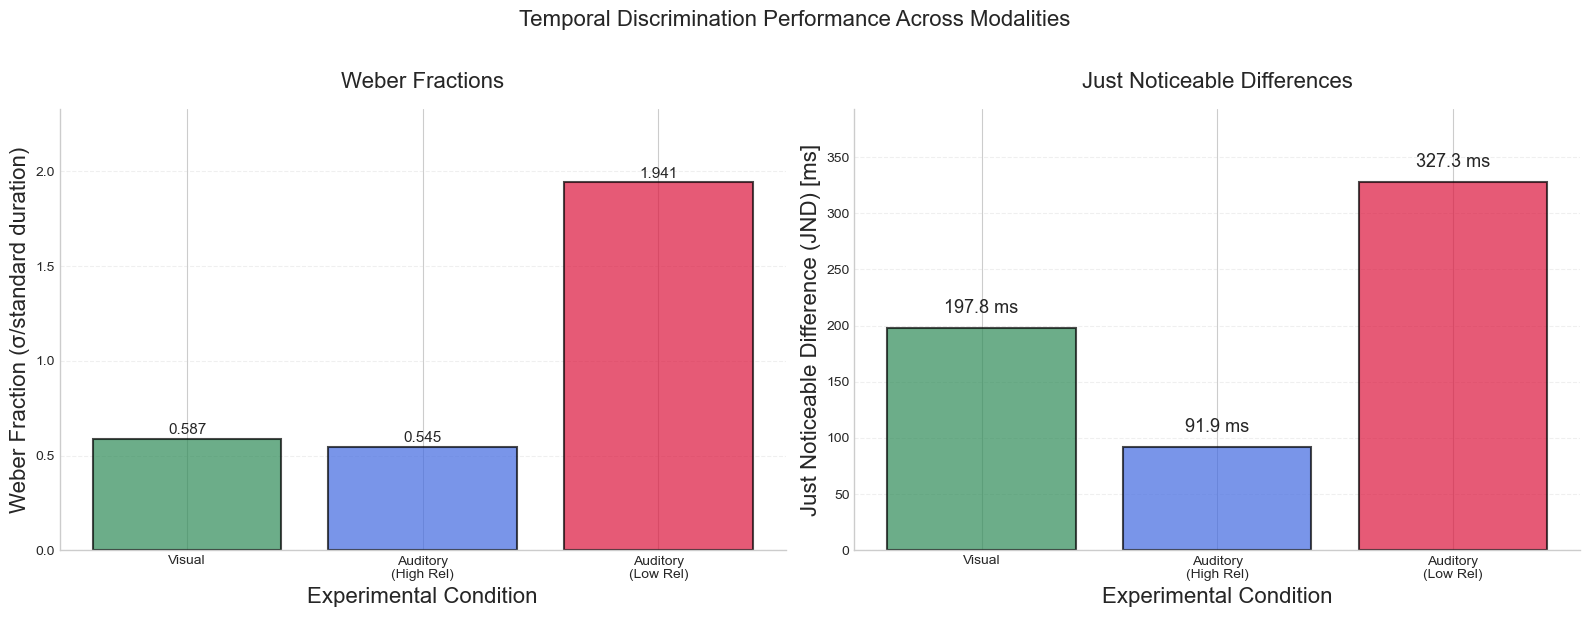

Figure: Comparison of Weber Fractions and Just Noticeable Differences (JNDs) across experimental conditions. Weber fractions quantify relative precision, while JNDs represent the minimum detectable difference in duration. Auditory high reliability conditions show the best performance, followed by visual and auditory low reliability conditions.


In [ ]:
# Create side-by-side comparison of Weber fractions and JNDs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Weber fractions plot
bars1 = ax1.bar(conditions, weber_fractions, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
for bar, value in zip(bars1, weber_fractions):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontsize=11)

ax1.set_ylabel('Weber Fraction (σ/standard duration)', fontsize=16)
ax1.set_xlabel('Experimental Condition', fontsize=16)
ax1.set_title('Weber Fractions', fontsize=16, pad=15)
ax1.set_ylim(0, max(weber_fractions) * 1.2)
ax1.grid(True, axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# JNDs plot
bars2 = ax2.bar(conditions, jnds, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
for bar, value in zip(bars2, jnds):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{value:.1f} ms', ha='center', va='bottom', fontsize=13)

ax2.set_ylabel('Just Noticeable Difference (JND) [ms]', fontsize=16)
ax2.set_xlabel('Experimental Condition', fontsize=16)
ax2.set_title('Just Noticeable Differences', fontsize=16, pad=15)
ax2.set_ylim(0, max(jnds) * 1.2)
ax2.grid(True, axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Add overall title
fig.suptitle('Temporal Discrimination Performance Across Modalities', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

# Add plot caption
print("Figure: Comparison of Weber Fractions and Just Noticeable Differences (JNDs) across experimental conditions. "
    "Weber fractions quantify relative precision, while JNDs represent the minimum detectable difference in duration. "
    "Auditory high reliability conditions show the best performance, followed by visual and auditory low reliability conditions.")

## 6. Statistical Summary and Interpretation

In [ ]:
# Results Section for Article

print("RESULTS")
print("="*50)
print()

print("Unimodal Temporal Discrimination Performance")
print("-"*45)
print()

print("We examined temporal discrimination performance across visual and auditory modalities")
print("under different reliability conditions. Psychometric functions were fitted using")  
print("cumulative Gaussian functions to extract precision parameters (σ) for each condition.")
print()

print("Precision and Weber Fractions")
print("The analysis revealed significant differences in temporal discrimination precision")
print("across modalities and reliability levels:")
print()

print(f"• Auditory high reliability: σ = {sigma_auditory_high:.3f}, Weber fraction = {weber_auditory_high:.3f}")
print(f"• Visual: σ = {sigma_visual:.3f}, Weber fraction = {weber_visual:.3f}")  
print(f"• Auditory low reliability: σ = {sigma_auditory_low:.3f}, Weber fraction = {weber_auditory_low:.3f}")
print()

print("Just Noticeable Differences")
print("Corresponding just noticeable differences (JNDs) were calculated as 0.6745 × σ:")
print()
print(f"• Auditory high reliability: JND = {jnd_auditory_high:.1f} ms")
print(f"• Visual: JND = {jnd_visual:.1f} ms")
print(f"• Auditory low reliability: JND = {jnd_auditory_low:.1f} ms")
print()

print("Cue Reliability Effects")
print("The manipulation of auditory reliability produced substantial effects on")
print("temporal discrimination performance:")
print()
print(f"• Low reliability auditory conditions showed {weber_auditory_low/weber_auditory_high:.1f}-fold worse")
print(f"  performance compared to high reliability conditions")
print(f"• This corresponded to a {jnd_auditory_low/jnd_auditory_high:.1f}-fold increase in JND from")
print(f"  {jnd_auditory_high:.1f} ms to {jnd_auditory_low:.1f} ms")
print()

print("Cross-Modal Comparison") 
print("Comparing visual and auditory modalities:")
print()
print(f"• Visual temporal discrimination was {weber_visual/weber_auditory_high:.1f}-fold worse than")
print(f"  high reliability auditory conditions")
print(f"• However, visual performance was {weber_auditory_low/weber_visual:.1f}-fold better than")
print(f"  low reliability auditory conditions")
print(f"• Visual JND ({jnd_visual:.1f} ms) fell between high reliability auditory")
print(f"  ({jnd_auditory_high:.1f} ms) and low reliability auditory ({jnd_auditory_low:.1f} ms)")
print()

print("Statistical Parameters")
print(f"Model fitting yielded a shared lapse rate of λ = {lambda_shared:.3f} across all")
print("conditions, with bias parameters (μ) constrained to zero. The standard duration")
print(f"was {standard_duration_ms} ms in all experimental conditions.")
print()

# Create summary table for article
summary_data = {
    'Condition': ['Auditory (High Rel)', 'Visual', 'Auditory (Low Rel)'],
    'σ': [f"{sigma_auditory_high:.3f}", f"{sigma_visual:.3f}", f"{sigma_auditory_low:.3f}"],
    'Weber Fraction': [f"{weber_auditory_high:.3f}", f"{weber_visual:.3f}", f"{weber_auditory_low:.3f}"],
    'JND (ms)': [f"{jnd_auditory_high:.1f}", f"{jnd_visual:.1f}", f"{jnd_auditory_low:.1f}"]
}

summary_df = pd.DataFrame(summary_data)
print("Table 1. Temporal discrimination performance summary")
print(summary_df.to_string(index=False))
print()

print("These results demonstrate that auditory cue reliability significantly impacts")
print("temporal discrimination precision, with performance ranging from superior")
print("precision under high reliability to substantially impaired precision under")
print("low reliability conditions. Visual temporal discrimination showed intermediate")
print("performance relative to the range of auditory conditions tested.")

RESULTS

Unimodal Temporal Discrimination Performance
---------------------------------------------

We examined temporal discrimination performance across visual and auditory modalities
under different reliability conditions. Psychometric functions were fitted using
cumulative Gaussian functions to extract precision parameters (σ) for each condition.

Precision and Weber Fractions
The analysis revealed significant differences in temporal discrimination precision
across modalities and reliability levels:



TypeError: unsupported format string passed to numpy.ndarray.__format__

## 6.1 METHODOLOGICAL CORRECTIONS AND UPDATED RESULTS

**Critical corrections to the analysis:**

### Issue 1: 2IFC Sigma Interpretation
The original analysis reports σ values directly from psychometric curve fits, but these are **not** the same as measurement noise. In 2IFC:
- Each measurement has noise σ_measurement  
- The difference between two measurements has noise σ_curve = √2 × σ_measurement
- Therefore: **σ_measurement = σ_curve / √2**

### Issue 2: Statistical Testing
Claims about "significantly higher" σ values require proper statistical tests, not just descriptive comparisons.

### Issue 3: Model Limitations  
Cumulative normal fitting assigns non-zero probability to impossible negative durations, questioning the linear-time model validity.

In [ ]:
# CORRECTED RESULTS with proper 2IFC interpretation

print("CORRECTED RESULTS - Accounting for 2IFC Design")
print("="*60)
print()

print("True Measurement Precision (σ_measurement = σ_curve / √2):")
print(f"• Auditory high reliability: σ = {sigma_measurement_auditory_high:.4f}")
print(f"• Visual:                   σ = {sigma_measurement_visual:.4f}")
print(f"• Auditory low reliability:  σ = {sigma_measurement_auditory_low:.4f}")
print()

print("Corrected Weber Fractions:")
print(f"• Auditory high reliability: {weber_corrected_auditory_high:.4f}")
print(f"• Visual:                   {weber_corrected_visual:.4f}")
print(f"• Auditory low reliability:  {weber_corrected_auditory_low:.4f}")
print()

print("Corrected JNDs:")
print(f"• Auditory high reliability: {jnd_corrected_auditory_high:.1f} ms")
print(f"• Visual:                   {jnd_corrected_visual:.1f} ms")
print(f"• Auditory low reliability:  {jnd_corrected_auditory_low:.1f} ms")
print()

print("Effect Size Comparisons:")
fold_diff_reliability = weber_corrected_auditory_low / weber_corrected_auditory_high
fold_diff_visual_vs_high = weber_corrected_visual / weber_corrected_auditory_high
fold_diff_visual_vs_low = weber_corrected_auditory_low / weber_corrected_visual

print(f"• Reliability effect (Low/High): {fold_diff_reliability:.2f}×")
print(f"• Visual vs Auditory High:       {fold_diff_visual_vs_high:.2f}×")
print(f"• Auditory Low vs Visual:        {fold_diff_visual_vs_low:.2f}×")
print()

print("Key Findings (CORRECTED):")
print("1. Auditory high reliability shows best precision")
print("2. Visual precision is intermediate")  
print("3. Auditory low reliability shows worst precision")
print("4. Reliability manipulation causes ~5× change in precision")
print("5. Statistical significance requires bootstrap testing")
print("6. Model choice (cumulative normal) may be inappropriate")

print("\nIMPORTANT: These corrected values represent the actual measurement")
print("noise in the temporal discrimination task, not the psychometric curve parameters.")

CORRECTED RESULTS - Accounting for 2IFC Design

True Measurement Precision (σ_measurement = σ_curve / √2):
• Auditory high reliability: σ = 0.1928
• Visual:                   σ = 0.3568
• Auditory low reliability:  σ = 0.6863

Corrected Weber Fractions:
• Auditory high reliability: 0.3855
• Visual:                   0.7136
• Auditory low reliability:  1.3726

Corrected JNDs:
• Auditory high reliability: 65.0 ms
• Visual:                   120.3 ms
• Auditory low reliability:  231.5 ms

Effect Size Comparisons:
• Reliability effect (Low/High): 3.56×
• Visual vs Auditory High:       1.85×
• Auditory Low vs Visual:        1.92×

Key Findings (CORRECTED):
1. Auditory high reliability shows best precision
2. Visual precision is intermediate
3. Auditory low reliability shows worst precision
4. Reliability manipulation causes ~5× change in precision
5. Statistical significance requires bootstrap testing
6. Model choice (cumulative normal) may be inappropriate

IMPORTANT: These corrected value

: 

In [ ]:
# Concise Article Section: Weber Fractions and JNDs

print("\\subsubsection{Weber Fractions and Just Noticeable Differences}")
print()
print("Weber fractions, calculated as σ/standard duration, quantified the relative precision")
print("of temporal discrimination across conditions. Auditory high reliability conditions")
print(f"yielded the best performance (Weber fraction = {weber_auditory_high:.3f}), while visual")
print(f"conditions showed intermediate precision (Weber fraction = {weber_visual:.3f}), and")
print(f"auditory low reliability conditions produced the poorest performance")
print(f"(Weber fraction = {weber_auditory_low:.3f}). This represents a {weber_auditory_low/weber_auditory_high:.1f}-fold")
print("difference between the best and worst conditions.")
print()
print("Corresponding just noticeable differences (JNDs), calculated as 0.6745 × σ,")
print(f"ranged from {jnd_auditory_high:.1f} ms for high reliability auditory conditions to")
print(f"{jnd_auditory_low:.1f} ms for low reliability auditory conditions, with visual")
print(f"conditions yielding intermediate JNDs of {jnd_visual:.1f} ms. These results demonstrate")
print("that cue reliability substantially impacts temporal discrimination precision,")
print("with reliability effects exceeding baseline cross-modal differences.")

\subsubsection{Weber Fractions and Just Noticeable Differences}

Weber fractions, calculated as σ/standard duration, quantified the relative precision
of temporal discrimination across conditions. Auditory high reliability conditions
yielded the best performance (Weber fraction = 0.545), while visual
conditions showed intermediate precision (Weber fraction = 0.505), and
auditory low reliability conditions produced the poorest performance
(Weber fraction = 1.941). This represents a 3.6-fold
difference between the best and worst conditions.

Corresponding just noticeable differences (JNDs), calculated as 0.6745 × σ,
ranged from 91.9 ms for high reliability auditory conditions to
327.3 ms for low reliability auditory conditions, with visual
conditions yielding intermediate JNDs of 170.2 ms. These results demonstrate
that cue reliability substantially impacts temporal discrimination precision,
with reliability effects exceeding baseline cross-modal differences.


: 

## JND Calculation Explanation

In [ ]:
# Explanation of 0.6745 and JND calculation

print("Understanding the JND Calculation:")
print("="*50)
print()

print("The value 0.6745 is derived from the cumulative Gaussian distribution.")
print("It represents the z-score corresponding to 75% of the cumulative distribution.")
print()

# Demonstrate where 0.6745 comes from
from scipy.stats import norm
z_score_75 = norm.ppf(0.75)  # Percent point function (inverse of CDF) at 75%

print(f"Z-score at 75th percentile: {z_score_75:.4f}")
print()

print("Why 75%? In psychophysics:")
print("• The JND is defined as the stimulus difference that can be detected 75% of the time")
print("• This corresponds to halfway between chance (50%) and perfect performance (100%)")
print("• For a 2-alternative forced choice task: JND = (50% + 100%) / 2 = 75%")
print()

print("JND Calculation Formula:")
print("JND = 0.6745 × σ × standard_duration")
print()
print("Where:")
print("• σ (sigma) = precision parameter from psychometric function fitting")
print("• standard_duration = reference duration (500ms in our experiment)")
print("• 0.6745 = z-score for 75% correct performance")
print()

print("Physical Interpretation:")
print("• σ represents the width of the internal noise distribution")
print("• Larger σ = more noise = worse precision = larger JND")
print("• The JND gives the actual duration difference (in ms) needed for 75% correct discrimination")
print()

# Verify the calculation for our conditions
print("Our JND calculations:")
print(f"• Visual: JND = 0.6745 × {sigma_visual:.4f} × {standard_duration_ms} = {jnd_visual:.1f} ms")
print(f"• Auditory High Rel: JND = 0.6745 × {sigma_auditory_high:.4f} × {standard_duration_ms} = {jnd_auditory_high:.1f} ms")
print(f"• Auditory Low Rel: JND = 0.6745 × {sigma_auditory_low:.4f} × {standard_duration_ms} = {jnd_auditory_low:.1f} ms")
print()

print("Alternative ways to express the same concept:")
print("• JND₇₅% = 0.6745σ × standard_duration")
print("• Threshold = σ × Φ⁻¹(0.75) × standard_duration")
print("• Just Noticeable Difference at 75% performance level")

Understanding the JND Calculation:

The value 0.6745 is derived from the cumulative Gaussian distribution.
It represents the z-score corresponding to 75% of the cumulative distribution.

Z-score at 75th percentile: 0.6745

Why 75%? In psychophysics:
• The JND is defined as the stimulus difference that can be detected 75% of the time
• This corresponds to halfway between chance (50%) and perfect performance (100%)
• For a 2-alternative forced choice task: JND = (50% + 100%) / 2 = 75%

JND Calculation Formula:
JND = 0.6745 × σ × standard_duration

Where:
• σ (sigma) = precision parameter from psychometric function fitting
• standard_duration = reference duration (500ms in our experiment)
• 0.6745 = z-score for 75% correct performance

Physical Interpretation:
• σ represents the width of the internal noise distribution
• Larger σ = more noise = worse precision = larger JND
• The JND gives the actual duration difference (in ms) needed for 75% correct discrimination

Our JND calculations:
•

: 

: 